<div class="alert alert-block alert-info">
<center> <h1> DATA MINING MDSAA-BA </h1> </center> <br>
<center> PROJECT 2021/2022 </center>

**GROUP BY:**    <br> 
- Beatriz Neto (20210608) <br>
- Diogo Marques (20210605) <br>
- Sara Silva (20210619)

**Table of Contents** <br>
* [1. Imports](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Dataset](#importdataset)
* [2. Data Preparation](#datapreparation)
    * [2.1. Descriptive Statistics](#statistics)
    * [2.2. Coherence Checking](#Coherence)
    * [2.3. Definition of the initial Metric and Non-metric Features](#defeatures)
    * [2.4. Missing Values](#missingvalues)
        * [2.4.1. Near Neighbors Method](#nearneighbors)
        * [2.4.2. Interative Imputer](#interative)
    * [2.5. Outlier Removal](#outlier)
        * [2.5.1. Non Metric Features](#nmetric)
        * [2.5.2. Metric Features](#metric)
            * [2.5.2.1. Filters 1 - Manual](#manual)
            * [2.5.2.2. Filters 2 - IQR](#iqr)
            * [2.5.2.3. Filters 3 - Manual & IQR](#manualiqr)
            * [2.5.2.4. Filters 4 - Z Score](#zscore)
* [3. Data Pre-Processing](#pre-processing)
    * [3.1. Feature Engineering](#engineering)
        * [3.1.1. New Variables](#newvariables)
    * [3.2. Dimensionality Reduction](#reduction)
        * [3.2.1. Redundancy](#redundancy)
        * [3.2.2. Relevancy](#relevancy)
* [4. Redo Data Exploration](#exploration)
* [5. Feature Scaling](#scaling)
    * [5.1. MinMaxScaler](#minmax)
    * [5.2. Standard Scaler](#standard)
    * [5.3. Robust Scaler](#robust)
* [6. One-Hot Encoding](#ohc)
* [7. DBSCAN- detection of remaining outliers in our dataset](#dbscan_outliers) 
* [8. Clustering Methods](#clustering)
    * [8.1. K-Prototypes Clustering](#kprototypes)
    * [8.2. K-Means + Hierarchical Clustering](#Kmeans_hierarchical)
    * [8.3. Self Organizing Maps + Hierarchical](#som_hier)
    * [8.4. Self Organizing Maps + K-Means](#som_kmeans)
    * [8.5. Mean Shift Clustering](#mean_shift)
    * [8.6. DBSCAN](#dbscan)
* [9. Comparison](#comparison)
* [10. Merging the Perspective using Hierarchical Clustering](#merger)
* [11. Cluster visualization using t-SNE](#t-sne)
* [12. Assess feature importance and reclassify outliers](#outliers)

<hr>
<a class="anchor" id="import">
    
# 1. Imports
    
</a>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [3]:
import sqlite3
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install missingno
import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
import graphviz
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from collections import Counter

!pip install kmodes
from kmodes.kprototypes import KPrototypes

!pip install plotnine
import plotnine

from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importdataset">

## 1.1. Import Dataset

</a>

In [5]:
path = 'https://raw.githubusercontent.com/SaraxSilva/Data-Mining-Project-21-22/main/'


data_insurance = pd.read_sas(path + "a2z_insurance.sas7bdat")

In [198]:
data_insurance.shape[0]

10296

<hr>
<a class="anchor" id="datapreparation">
    
# 2. Data Preparation
    
</a>

### Explore Datatypes



In [199]:
data_insurance.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [200]:
# fix wrong dtypes
data_insurance["CustID"] = data_insurance["CustID"].astype("int64")
data_insurance["GeoLivArea"] = data_insurance["GeoLivArea"].astype("object")
data_insurance["Children"] = data_insurance["Children"].astype("object")

# set the new index
data_insurance.set_index("CustID", inplace = True)
data_insurance.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea        object
Children          object
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

### Check and Drop Duplicates

In [201]:
# we have 3 duplicated values
data_insurance.duplicated().sum() 
data_insurance.drop_duplicates(inplace = True)

<a class="anchor" id="statistics">

## 2.1. Descriptive Statistics

</a>

In [202]:
data_insurance.describe().T

count         mean          std        min      25%      50%  \
FirstPolYear   10263.0  1991.064893   511.342617    1974.00  1980.00  1986.00   
BirthYear      10276.0  1968.006909    19.710742    1028.00  1953.00  1968.00   
MonthSal       10257.0  2506.618699  1157.518390     333.00  1706.00  2502.00   
CustMonVal     10293.0   177.929963  1946.091554 -165680.42    -9.44   187.03   
ClaimsRate     10293.0     0.742728     2.917385       0.00     0.39     0.72   
PremMotor      10259.0   300.501550   211.937740      -4.11   190.59   298.61   
PremHousehold  10293.0   210.419863   352.635041     -75.00    49.45   132.80   
PremHealth     10250.0   171.553183   296.444399      -2.11   111.80   162.81   
PremLife       10189.0    41.848724    47.484264      -7.00     9.89    25.56   
PremWork       10207.0    41.283712    51.519022     -12.00    10.67    25.67   

                   75%       max  
FirstPolYear   1992.00  53784.00  
BirthYear      1983.00   2001.00  
MonthSal       3290.00  55215.00  
CustMonVal      399.86  11875.89  
ClaimsRate        0.98    256.20  
PremMotor       408.30  11604.42  
PremHousehold   290.05  25048.80  
PremHealth      219.04  28272.00  
PremLife         57.79    398.30  
PremWork         56.79   1988.70

<hr>
<a class="anchor" id="Coherence">
    
## 2.2. Coherence Checking
    
</a>

In [203]:
# Doesn't make sense to have people with FirstPolYear even before they were born
# Having in mind that it make more sense that the birth year was wrongly given 
# by the customers we chose to replace the wrong data of that column by nan 

# Drop the BirthYear column
data_insurance.drop('BirthYear', axis = 1, inplace = True) 

<hr>
<a class="anchor" id="defeatures">
    
## 2.3. Definition of the initial Metric and Non-metric Features
    
</a>

In [204]:
non_metric_features = ['GeoLivArea', 'Children', 'EducDeg']
metric_features = data_insurance.columns.drop(non_metric_features).to_list()

<a class="anchor" id="missingvalues">

## 2.4. Missing Values

</a>

In [205]:
data_insurance.replace("", np.nan, inplace=True)

In [206]:
## Count missing values
data_insurance.isna().sum()

FirstPolYear      30
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

<AxesSubplot:>

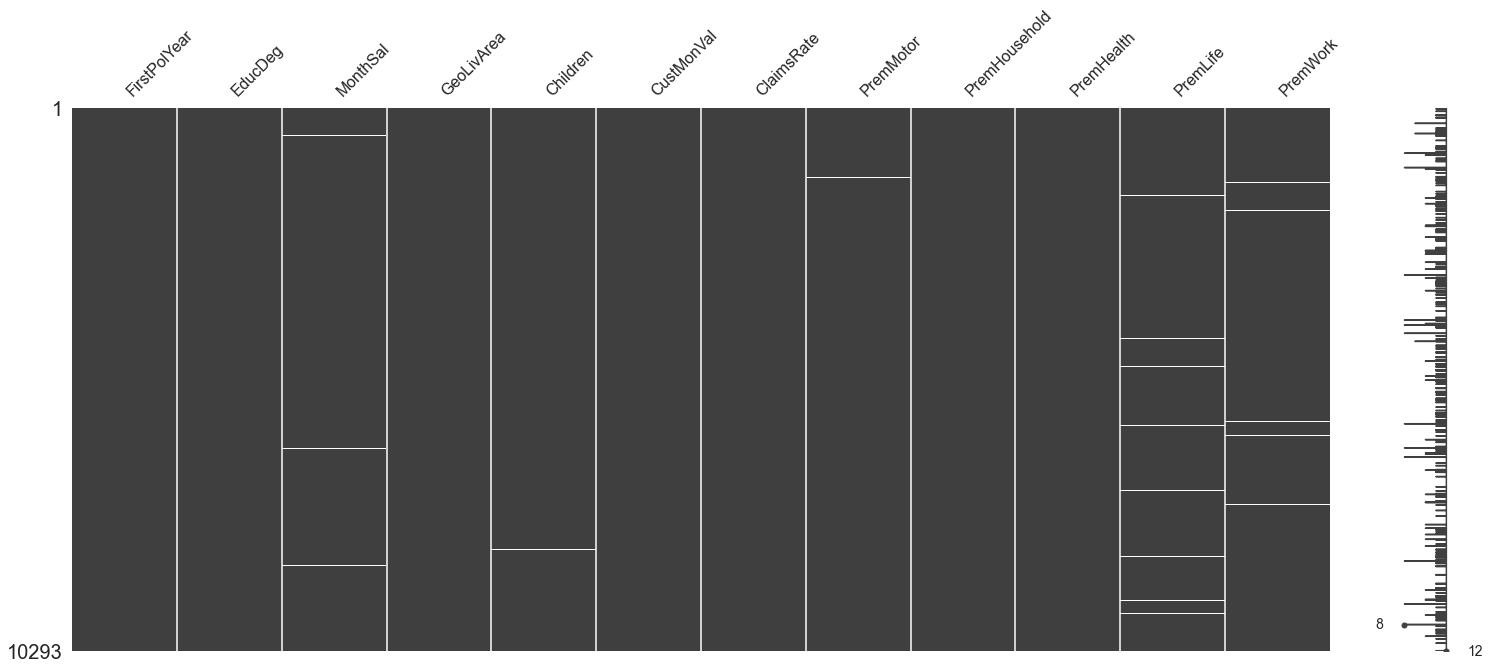

In [207]:
# parecem todos MCAR (missing complety at random)
msno.matrix(data_insurance)

<AxesSubplot:>

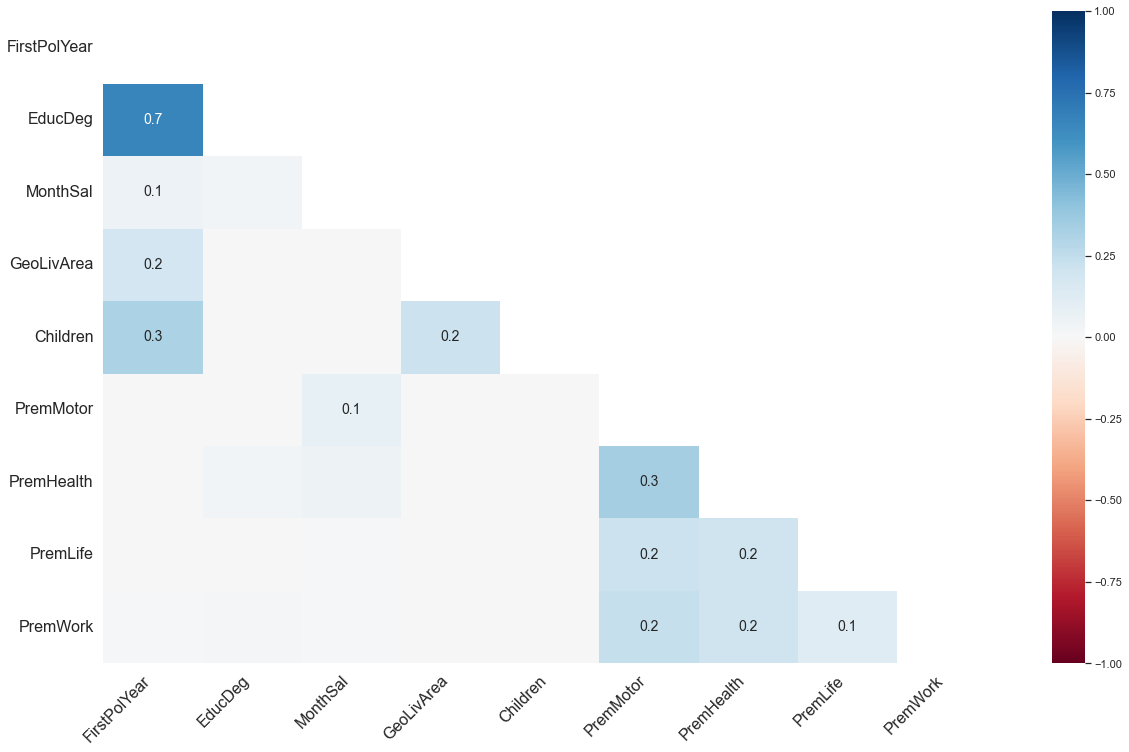

In [208]:
msno.heatmap(data_insurance)

In [209]:
# in our interpretation, the nan values in the Premiums columns are related with 
# customers that don't have that certain type of insurance

data_insurance[['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']].fillna(0, inplace = True)

<hr>
<a class="anchor" id="nearneighbors">

## 2.4.1. Near Neighbors Method

</a>

### Inputing Categorical Values

In [210]:
df_neighbors = data_insurance.copy()

In [211]:
# convert categorical variables to numerical

# Create Ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Select non-null values of the categorical variables of df_neighbors
educ = df_neighbors["EducDeg"]
educ_not_null = educ[educ.notnull()]

# Reshape educ_not_null to shape (-1, 1)
reshaped_vals = educ_not_null.values.reshape(-1,1)

# Ordinally encode reshaped_vals
encoded_vals = ordinal_encoder.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values
df_neighbors.loc[educ.notnull(), "EducDeg"] = np.squeeze(encoded_vals)

In [212]:
# Create KNN imputer
#  parameter weights = 'distance' so the nearest neighbors have more influence/weight 
# on the prediction than the farthest ones

# n_neighbors = 1 because we want to reverse transform back to categorical and
# more than one neighbor the return value can be mean

KNN_imputer = KNNImputer(n_neighbors = 1, weights = 'distance')

df_neighbors[non_metric_features] = KNN_imputer.fit_transform(df_neighbors[non_metric_features])

reshaped_vals = df_neighbors["EducDeg"].values.reshape(-1,1)

df_neighbors["EducDeg"] = ordinal_encoder.inverse_transform(reshaped_vals)

df_neighbors[non_metric_features].head()

GeoLivArea  Children             EducDeg
CustID                                          
1              1.0       1.0  b'2 - High School'
2              4.0       1.0  b'2 - High School'
3              3.0       0.0        b'1 - Basic'
4              4.0       1.0      b'3 - BSc/MSc'
5              4.0       1.0      b'3 - BSc/MSc'

### Inputing Numerical Values

In [213]:
# Scaled the data with MinMaxScaler()
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_neighbors[metric_features])

In [214]:
df_neighbors[metric_features] = scaled_feat
df_neighbors.head()

FirstPolYear             EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                     
1           0.000212  b'2 - High School'  0.033599         1.0       1.0   
2           0.000135  b'2 - High School'  0.006268         4.0       1.0   
3           0.000328        b'1 - Basic'  0.035421         3.0       0.0   
4           0.000309      b'3 - BSc/MSc'  0.013957         4.0       1.0   
5           0.000232      b'3 - BSc/MSc'  0.026056         4.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1         0.935260    0.001522   0.032731       0.006148    0.005251   
2         0.932376    0.004372   0.007027       0.019551    0.004202   
3         0.935957    0.001093   0.018113       0.011921    0.004481   
4         0.933019    0.003864   0.016074       0.004711    0.011080   
5         0.933313    0.003513   0.029524       0.004888    0.006532   

        PremLife  PremWork  
CustID                      
1       0.133259  0.014440  
2       0.497113  0.059044  
3       0.230323  0.055491  
4       0.104466  0.020163  
5       0.063607  0.026716

In [215]:
# Use KNNImputer only for numerical variables
imputer = KNNImputer(weights = "distance")
df_neighbors[metric_features] = imputer.fit_transform(df_neighbors[metric_features])

In [216]:
reshaped_vals = df_neighbors[metric_features].values.reshape(-1,1)

df_neighbors[metric_features] = scaler.inverse_transform(df_neighbors[metric_features])

In [217]:
df_neighbors.head()

FirstPolYear             EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                     
1             1985.0  b'2 - High School'    2177.0         1.0       1.0   
2             1981.0  b'2 - High School'     677.0         4.0       1.0   
3             1991.0        b'1 - Basic'    2277.0         3.0       0.0   
4             1990.0      b'3 - BSc/MSc'    1099.0         4.0       1.0   
5             1986.0      b'3 - BSc/MSc'    1763.0         4.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1           380.97        0.39     375.85          79.45      146.36   
2          -131.13        1.12      77.46         416.20      116.69   
3           504.67        0.28     206.15         224.50      124.58   
4           -16.99        0.99     182.48          43.35      311.17   
5            35.23        0.90     338.62          47.80      182.59   

        PremLife  PremWork  
CustID                      
1          47.01     16.89  
2         194.48    106.13  
3          86.35     99.02  
4          35.34     28.34  
5          18.78     41.45

<hr>
<a class="anchor" id="interative">

## 2.4.2. Interative Imputer

</a>

### Inputing Categorical Values

In [218]:
df_interative = data_insurance.copy()

In [219]:
# Create Ordinal encoder- following the same logic of the previous step
ordinal_encoder = OrdinalEncoder()


educ = df_interative["EducDeg"]
educ_not_null = educ[educ.notnull()]


reshaped_vals = educ_not_null.values.reshape(-1,1)


encoded_vals = ordinal_encoder.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values
df_interative.loc[educ.notnull(), "EducDeg"] = np.squeeze(encoded_vals)

In [220]:
ordinal_encoder2 = OrdinalEncoder()
# Select non-null values of the categorical variables of df_interative
chil = df_interative["Children"]
chil_not_null = chil[chil.notnull()]

# Reshape chill_not_null to shape (-1, 1)
reshaped_vals2 = chil_not_null.values.reshape(-1,1)


encoded_vals2 = ordinal_encoder2.fit_transform(reshaped_vals2)


df_interative.loc[chil.notnull(), "Children"] = np.squeeze(encoded_vals2)

In [221]:
ordinal_encoder3 = OrdinalEncoder()
# Select non-null values of the categorical variables of df_interative
geo = df_interative["GeoLivArea"]
geo_not_null = geo[geo.notnull()]

# Reshape geo_not_null to shape (-1, 1)
reshaped_vals3 = geo_not_null.values.reshape(-1,1)


encoded_vals3 = ordinal_encoder3.fit_transform(reshaped_vals3)


df_interative.loc[geo.notnull(), "GeoLivArea"] = np.squeeze(encoded_vals3)

In [222]:
interative_imputer = IterativeImputer(random_state = 93)

# Impute using fit_tranform 
df_interative[non_metric_features] = interative_imputer.fit_transform(df_interative[non_metric_features])

reshaped_vals = df_interative["EducDeg"].values.reshape(-1,1)

df_interative["EducDeg"] = ordinal_encoder.inverse_transform(reshaped_vals)

In [223]:
reshaped_vals2 = df_interative["Children"].values.reshape(-1,1)

df_interative["Children"] = ordinal_encoder2.inverse_transform(reshaped_vals2)

In [224]:
reshaped_vals3 = df_interative["GeoLivArea"].values.reshape(-1,1)

df_interative['GeoLivArea'] = ordinal_encoder3.inverse_transform(reshaped_vals3)

### Inputing Numerical Values

In [225]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_interative[metric_features])

In [226]:
df_interative[metric_features] = scaled_feat
df_interative.head()

FirstPolYear             EducDeg  MonthSal GeoLivArea Children  \
CustID                                                                   
1           0.000212  b'2 - High School'  0.033599        1.0      1.0   
2           0.000135  b'2 - High School'  0.006268        4.0      1.0   
3           0.000328        b'1 - Basic'  0.035421        3.0      0.0   
4           0.000309      b'3 - BSc/MSc'  0.013957        4.0      1.0   
5           0.000232      b'3 - BSc/MSc'  0.026056        4.0      1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1         0.935260    0.001522   0.032731       0.006148    0.005251   
2         0.932376    0.004372   0.007027       0.019551    0.004202   
3         0.935957    0.001093   0.018113       0.011921    0.004481   
4         0.933019    0.003864   0.016074       0.004711    0.011080   
5         0.933313    0.003513   0.029524       0.004888    0.006532   

        PremLife  PremWork  
CustID                      
1       0.133259  0.014440  
2       0.497113  0.059044  
3       0.230323  0.055491  
4       0.104466  0.020163  
5       0.063607  0.026716

In [227]:
interative_imputer = IterativeImputer(random_state = 93)

# Impute using fit_tranform 
df_interative[metric_features] = imputer.fit_transform(df_interative[metric_features])
 
    
df_interative[metric_features].isna().sum()

FirstPolYear     0
MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [228]:
reshaped_vals1 = df_interative[metric_features].values.reshape(-1,1)

df_interative[metric_features] = scaler.inverse_transform(df_interative[metric_features])

In [229]:
df_interative.head()

FirstPolYear             EducDeg  MonthSal GeoLivArea Children  \
CustID                                                                   
1             1985.0  b'2 - High School'    2177.0        1.0      1.0   
2             1981.0  b'2 - High School'     677.0        4.0      1.0   
3             1991.0        b'1 - Basic'    2277.0        3.0      0.0   
4             1990.0      b'3 - BSc/MSc'    1099.0        4.0      1.0   
5             1986.0      b'3 - BSc/MSc'    1763.0        4.0      1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1           380.97        0.39     375.85          79.45      146.36   
2          -131.13        1.12      77.46         416.20      116.69   
3           504.67        0.28     206.15         224.50      124.58   
4           -16.99        0.99     182.48          43.35      311.17   
5            35.23        0.90     338.62          47.80      182.59   

        PremLife  PremWork  
CustID                      
1          47.01     16.89  
2         194.48    106.13  
3          86.35     99.02  
4          35.34     28.34  
5          18.78     41.45

<hr>
<a class="anchor" id="outlier">
    
# 2.5. Outlier Removal
    
</a>

### Data Visualization

In [230]:
df_insurance = df_interative.copy()

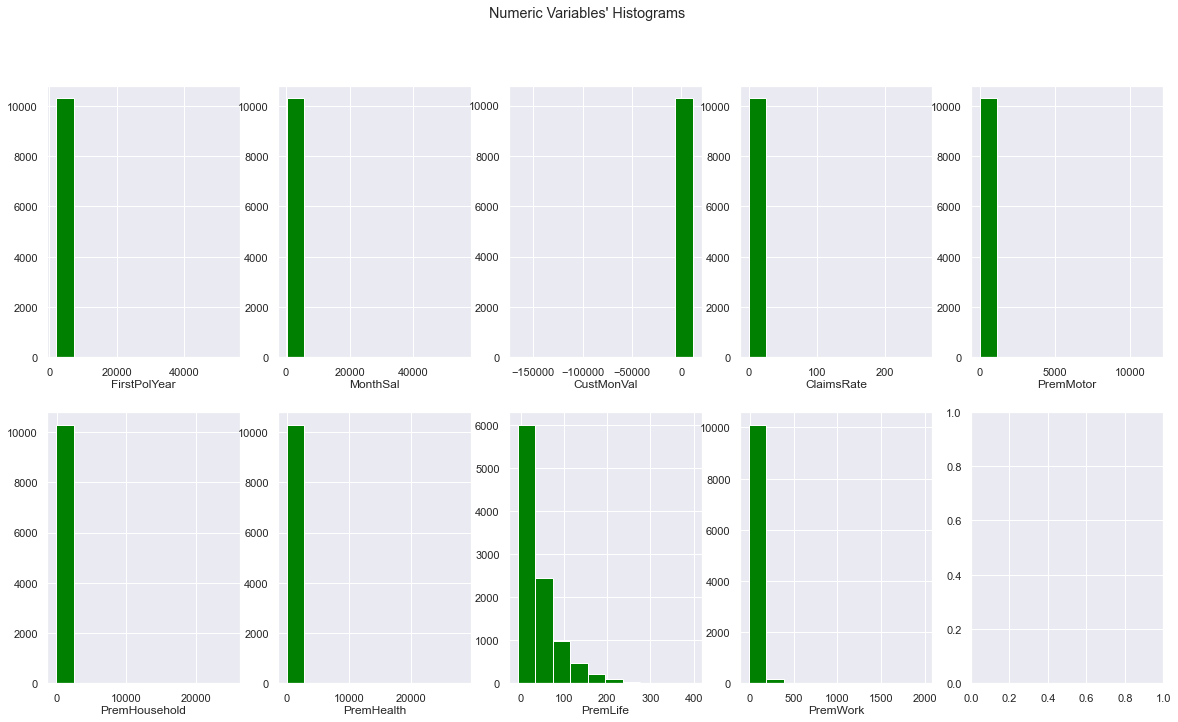

In [231]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df_insurance[feat], color = 'green')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

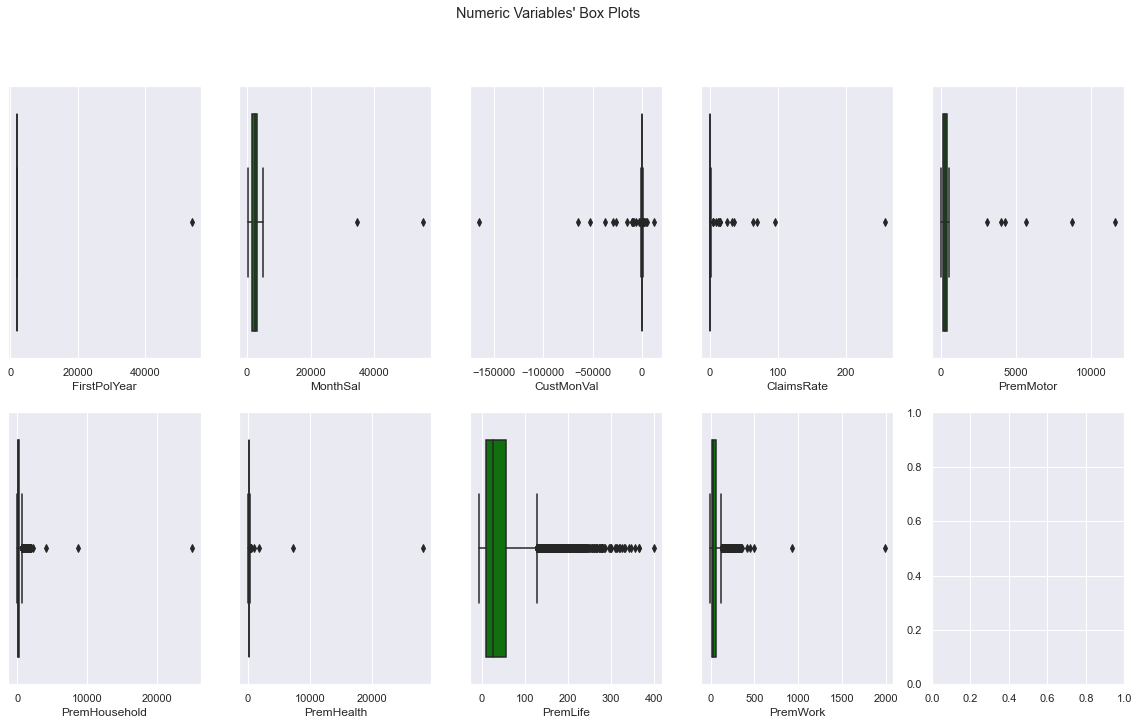

In [232]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(df_insurance[feat], ax=ax, color = 'green')
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

##### As it's possible to identify by the histograms, we can see there are several problems with our data, probably related with existence of outliers

<hr>
<a class="anchor" id="nmetric">
    
## 2.5.1 Non Metric Features
    
</a>

By counting the values for each Non Metric Feature, it seems that there are no outliers to treat

In [233]:
df_insurance['GeoLivArea'].value_counts()

4.0    4142
1.0    3048
3.0    2066
2.0    1037
Name: GeoLivArea, dtype: int64

In [234]:
df_insurance['Children'].value_counts()

1.0    7260
0.0    3033
Name: Children, dtype: int64

In [235]:
df_insurance['EducDeg'].value_counts()

b'3 - BSc/MSc'        4799
b'2 - High School'    3524
b'1 - Basic'          1272
b'4 - PhD'             698
Name: EducDeg, dtype: int64

<hr>
<a class="anchor" id="metric">
    
## 2.5.2 Metric Features
    
</a>

<hr>
<a class="anchor" id="manual">
    
### 2.5.2.1. Filters 1- Manual
    
</a>

In [236]:
df_insurance_manually = df_insurance.copy()

In [237]:
# By analyzing the above visualizations, establish filters for each variable

filters = (
    (df_insurance_manually['FirstPolYear'] <= 2016)
    &
    (df_insurance_manually['MonthSal'] <= 8000)
    &
    (df_insurance_manually['CustMonVal'] >= -1000) 
    &
    (df_insurance_manually['CustMonVal'] <= 1100)
    &
    (df_insurance_manually['ClaimsRate'] <= 3)
    &
    (df_insurance_manually['PremMotor'] <= 2000)
    &
    (df_insurance_manually['PremHousehold'] <= 1500)
    &
    (df_insurance_manually['PremLife'] <= 300)
    &
    (df_insurance_manually['PremWork'] <= 300)
    &
    (df_insurance_manually['PremHealth'] <= 5000)
)

df_insurance_manually = df_insurance_manually[filters]

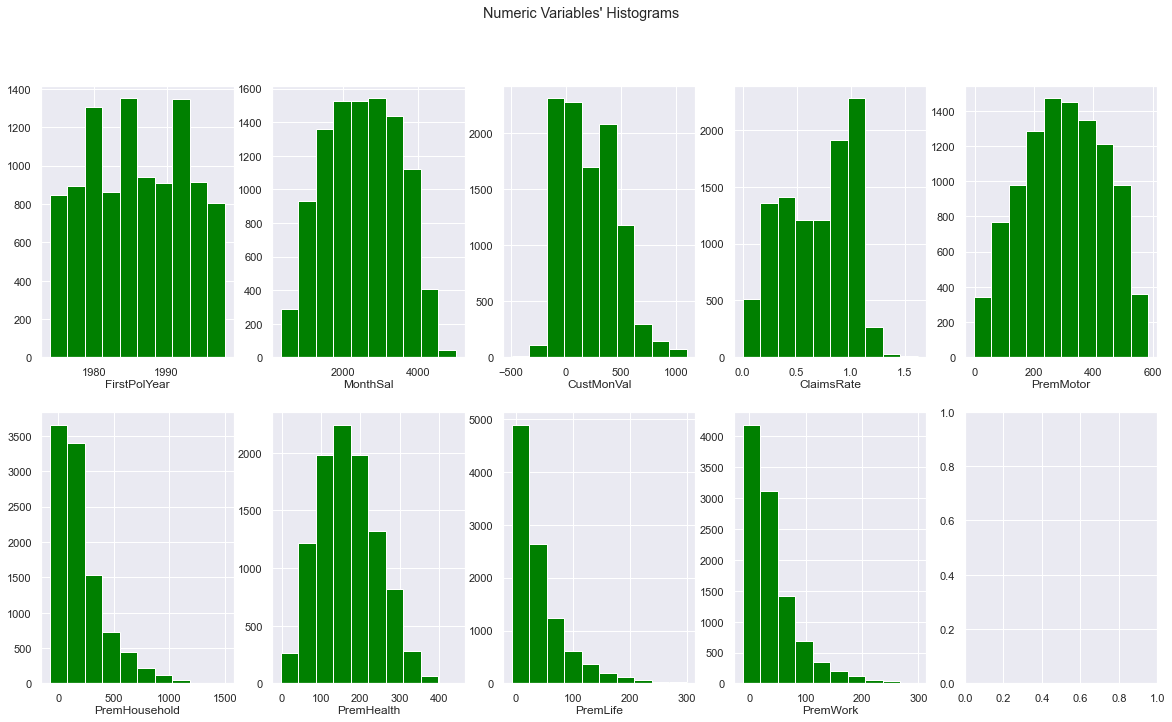

In [238]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_insurance_manually[feat], color = 'green')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [239]:
print('Percentage of data kept after removing outliers:', np.round(df_insurance_manually.shape[0] / df_insurance.shape[0], 4))

Percentage of data kept after removing outliers: 0.9886


<hr>
<a class="anchor" id="iqr">
    
### 2.5.2.2. Filters 2- IQR
    
</a>

In [240]:
df_insurance_iqr = df_insurance.copy()

In [241]:
q25 = df_insurance_iqr.quantile(.25)
q75 = df_insurance_iqr.quantile(.75)
iqr = (q75 - q25)
# Establishing an upper and a lower limit, that will function as outliers borders

upper_lim = q75 + 4 * iqr
lower_lim = q25 - 4 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_insurance_iqr[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))

df_insurance_iqr = df_insurance_iqr.reset_index()[filters2]
df_out = df_insurance_iqr.reset_index()[~filters2]

print('Percentage of data kept after removing outliers:', np.round(df_insurance_iqr.shape[0] / df_insurance.shape[0], 4))

Percentage of data kept after removing outliers: 0.9822


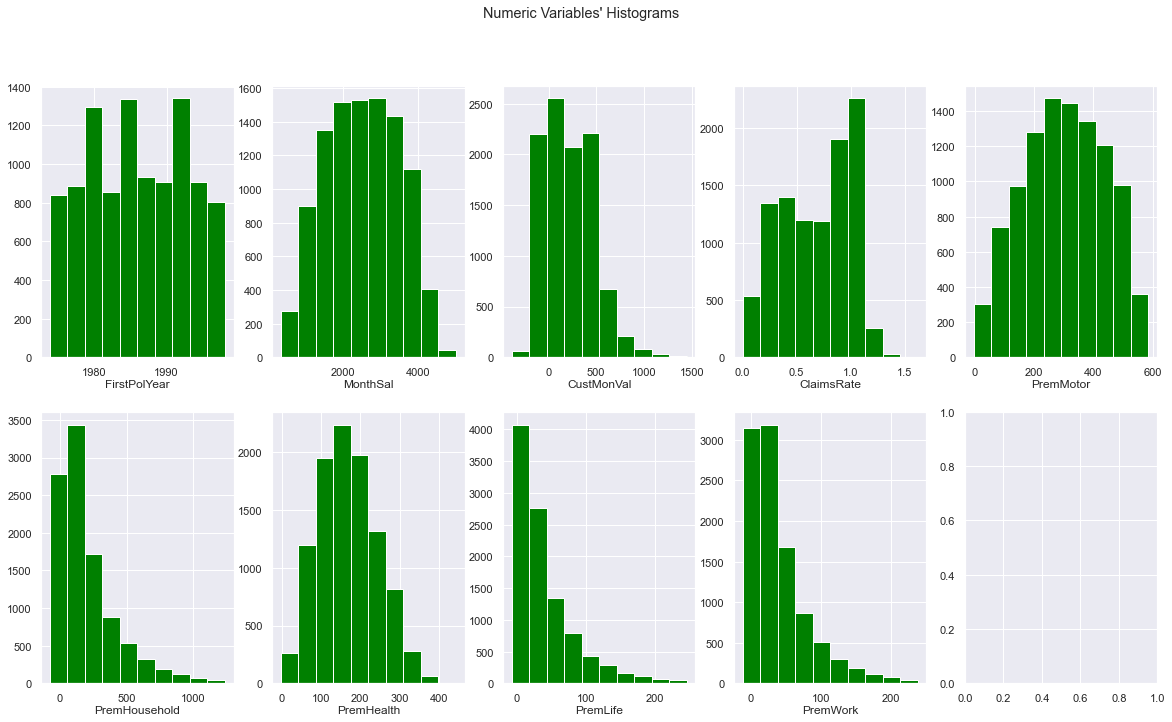

In [242]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_insurance_iqr[feat], color = 'green')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

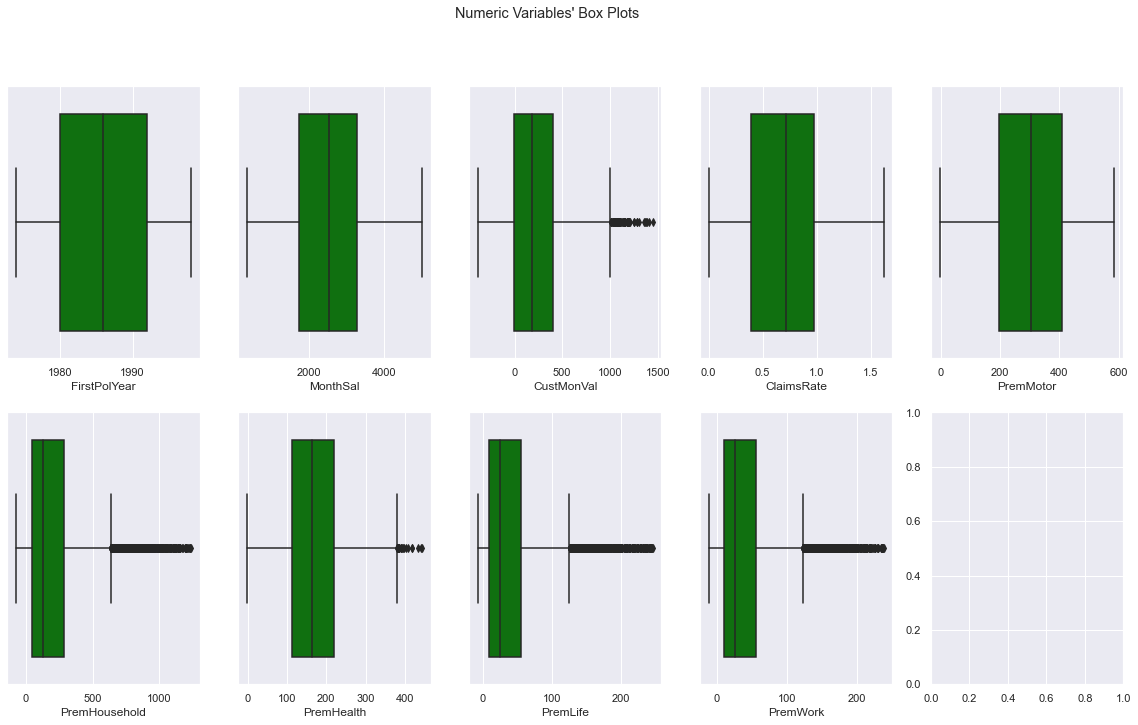

In [243]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(df_insurance_iqr[feat], ax=ax,   color = 'green')
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="manualiqr">
    
### 2.5.2.3. Filters 3- Manual & IQR

</a>

In [244]:
df_insurance_both = df_insurance[(filters | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_insurance_both.shape[0] / df_insurance.shape[0], 4))

Percentage of data kept after removing outliers: 0.9994


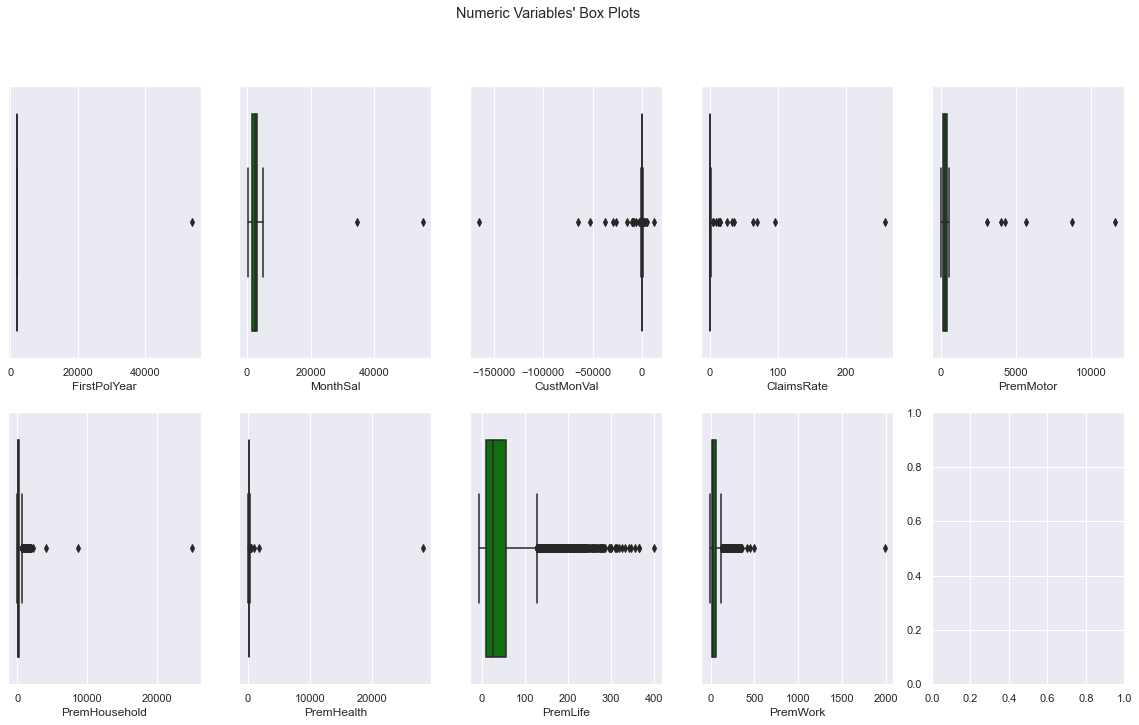

In [245]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(df_insurance_both[feat], ax=ax,   color = 'green')
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="zscore">
    
### 2.5.2.4. Filters 4- Z-Score
    
</a>

In [246]:
z = np.abs(stats.zscore(df_insurance[metric_features]))

#only keep rows in dataframe with all z-scores less than absolute value of 4 
df_insurance_zscore = df_insurance[(z < 4).all(axis = 1)]

print('Percentage of train data kept after removing outliers:', np.round(df_insurance_zscore.shape[0] / df_insurance.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9832


<hr>
<a class="anchor" id="pre-processing">
    
# 3. Data Pre-Processing
    
</a>

<hr>
<a class="anchor" id="engineering">
    
# 3.1. Feature Engineering
    
</a>

In [247]:
df = df_insurance_iqr.copy()
df.set_index("CustID", inplace = True)

<hr>
<a class="anchor" id="newvariables">
    
### 3.1.1 New Variables
    
</a>

In [248]:
# It makes more sense to pass the firstpolyear to years as customer, 
# since CMV encompasses the years that each consumer is customer
df['YearsCustomer'] = 2016 - df['FirstPolYear']

# Total premiums
df['PremTotal'] = df['PremMotor'] + df['PremHousehold'] + df['PremHealth'] + df['PremLife'] + df['PremWork']

# Anual salary (monthly salary multiplied by 14 because of vacation and christmas grants)
# It makes more sense to move the salary to annual, since the premiums are annual, being working on the same scale
df['AnualSal'] = 14 * df['MonthSal']

# Propotion of the total money spent on premiums that was spent in each category
df['RatioMotor'] = df['PremMotor'] / df['PremTotal']

df['RatioHousehold'] = df['PremHousehold'] / df['PremTotal']

df['RatioHealth'] = df['PremHealth'] / df['PremTotal']

df['RatioLife'] = df['PremLife'] / df['PremTotal']

df['RatioWork'] = df['PremWork'] / df['PremTotal']

In [249]:
df.describe().T

count          mean           std          min  \
FirstPolYear    10110.0   1986.024371      6.599175  1974.000000   
MonthSal        10110.0   2516.874612    974.231239   333.000000   
CustMonVal      10110.0    216.298254    251.008505  -386.180000   
ClaimsRate      10110.0      0.679645      0.317389     0.000000   
PremMotor       10110.0    300.777603    135.738726    -4.110000   
PremHousehold   10110.0    200.573081    222.456920   -75.000000   
PremHealth      10110.0    168.832287     74.079297    -2.110000   
PremLife        10110.0     40.047884     43.770606    -7.000000   
PremWork        10110.0     39.122771     42.348505   -12.000000   
YearsCustomer   10110.0     29.975629      6.599175    18.000000   
PremTotal       10110.0    749.353626    180.752232   429.190000   
AnualSal        10110.0  35236.244564  13639.237349  4662.000000   
RatioMotor      10110.0      0.445188      0.247132    -0.004646   
RatioHousehold  10110.0      0.222333      0.195038    -0.153465   
RatioHealth     10110.0      0.232175      0.108444    -0.003850   
RatioLife       10110.0      0.050751      0.052866    -0.013459   
RatioWork       10110.0      0.049552      0.051356    -0.024554   

                         25%           50%           75%           max  
FirstPolYear     1980.000000   1986.000000   1992.000000   1998.000000  
MonthSal         1742.000000   2525.000000   3295.000000   5021.000000  
CustMonVal         -9.000000    186.595000    397.967500   1448.280000  
ClaimsRate          0.390000      0.720000      0.980000      1.620000  
PremMotor         197.260000    302.500000    409.300000    585.220000  
PremHousehold      48.900000    131.700000    284.500000   1238.000000  
PremHealth        112.910000    163.810000    219.930000    442.860000  
PremLife            9.890000     24.670000     56.010000    245.380000  
PremWork           10.000000     25.495538     54.900000    237.380000  
YearsCustomer      24.000000     30.000000     36.000000     42.000000  
PremTotal         626.477500    696.745000    820.570000   1591.630000  
AnualSal        24388.000000  35350.000000  46130.000000  70294.000000  
RatioMotor          0.243772      0.429448      0.631557      1.100381  
RatioHousehold      0.077851      0.187709      0.347029      0.786577  
RatioHealth         0.148891      0.219387      0.301328      0.763156  
RatioLife           0.014225      0.034742      0.070863      0.416501  
RatioWork           0.015040      0.034981      0.070274      0.378650

In [250]:
df.describe()

FirstPolYear      MonthSal    CustMonVal    ClaimsRate     PremMotor  \
count  10110.000000  10110.000000  10110.000000  10110.000000  10110.000000   
mean    1986.024371   2516.874612    216.298254      0.679645    300.777603   
std        6.599175    974.231239    251.008505      0.317389    135.738726   
min     1974.000000    333.000000   -386.180000      0.000000     -4.110000   
25%     1980.000000   1742.000000     -9.000000      0.390000    197.260000   
50%     1986.000000   2525.000000    186.595000      0.720000    302.500000   
75%     1992.000000   3295.000000    397.967500      0.980000    409.300000   
max     1998.000000   5021.000000   1448.280000      1.620000    585.220000   

       PremHousehold    PremHealth      PremLife      PremWork  YearsCustomer  \
count   10110.000000  10110.000000  10110.000000  10110.000000   10110.000000   
mean      200.573081    168.832287     40.047884     39.122771      29.975629   
std       222.456920     74.079297     43.770606     42.348505       6.599175   
min       -75.000000     -2.110000     -7.000000    -12.000000      18.000000   
25%        48.900000    112.910000      9.890000     10.000000      24.000000   
50%       131.700000    163.810000     24.670000     25.495538      30.000000   
75%       284.500000    219.930000     56.010000     54.900000      36.000000   
max      1238.000000    442.860000    245.380000    237.380000      42.000000   

          PremTotal      AnualSal    RatioMotor  RatioHousehold   RatioHealth  \
count  10110.000000  10110.000000  10110.000000    10110.000000  10110.000000   
mean     749.353626  35236.244564      0.445188        0.222333      0.232175   
std      180.752232  13639.237349      0.247132        0.195038      0.108444   
min      429.190000   4662.000000     -0.004646       -0.153465     -0.003850   
25%      626.477500  24388.000000      0.243772        0.077851      0.148891   
50%      696.745000  35350.000000      0.429448        0.187709      0.219387   
75%      820.570000  46130.000000      0.631557        0.347029      0.301328   
max     1591.630000  70294.000000      1.100381        0.786577      0.763156   

          RatioLife     RatioWork  
count  10110.000000  10110.000000  
mean       0.050751      0.049552  
std        0.052866      0.051356  
min       -0.013459     -0.024554  
25%        0.014225      0.015040  
50%        0.034742      0.034981  
75%        0.070863      0.070274  
max        0.416501      0.378650

<hr>
<a class="anchor" id="reduction">
    
## 3.2. Dimensionality Reduction
    
</a>

<hr>
<a class="anchor" id="redundancy">
    
### 3.2.1 Redundancy
    
</a>

In [251]:
metric_features.extend(['YearsCustomer', 'PremTotal', 'AnualSal', 'RatioMotor', 'RatioHousehold', 'RatioHealth', 'RatioLife', 'RatioWork'])

In [252]:
# Verify correlations between each pair of variables including the new ones
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    matrix = np.triu(cor)
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1', mask = matrix)
    plt.show()

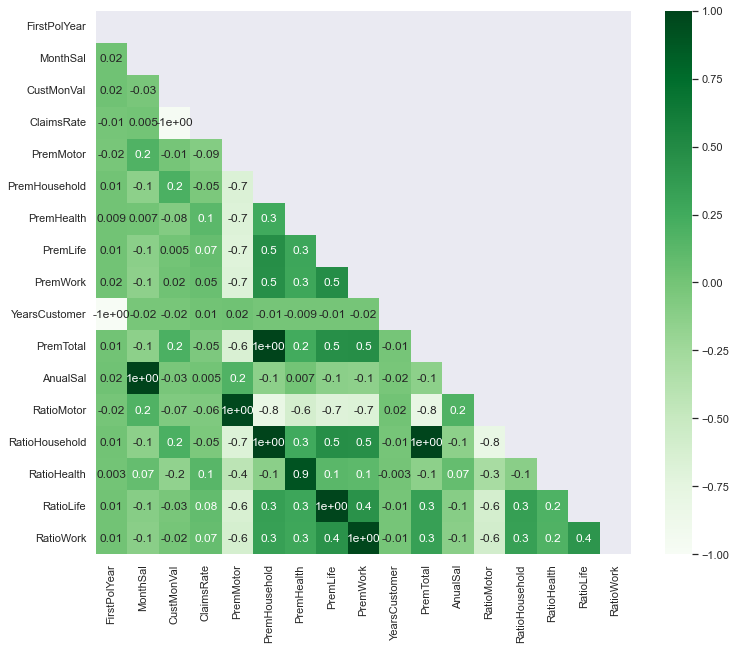

In [253]:
cor_spearman = df[metric_features].corr(method ='spearman')
cor_heatmap(cor_spearman)

In [254]:
# After analyzing the heatmap, we decided to drop some highly correlated variables
df.drop(["FirstPolYear", "MonthSal", "PremHousehold", "PremHealth", "PremMotor", "PremLife", "PremWork"], axis = 1, inplace = True)

In [255]:
for i in ["FirstPolYear","MonthSal", "PremHousehold", "PremHealth", "PremMotor", "PremLife", "PremWork"]:
    metric_features.remove(i)

<hr>
<a class="anchor" id="relevancy">
    
### 3.2.2. Relevancy
    
</a>

<Figure size 720x720 with 0 Axes>

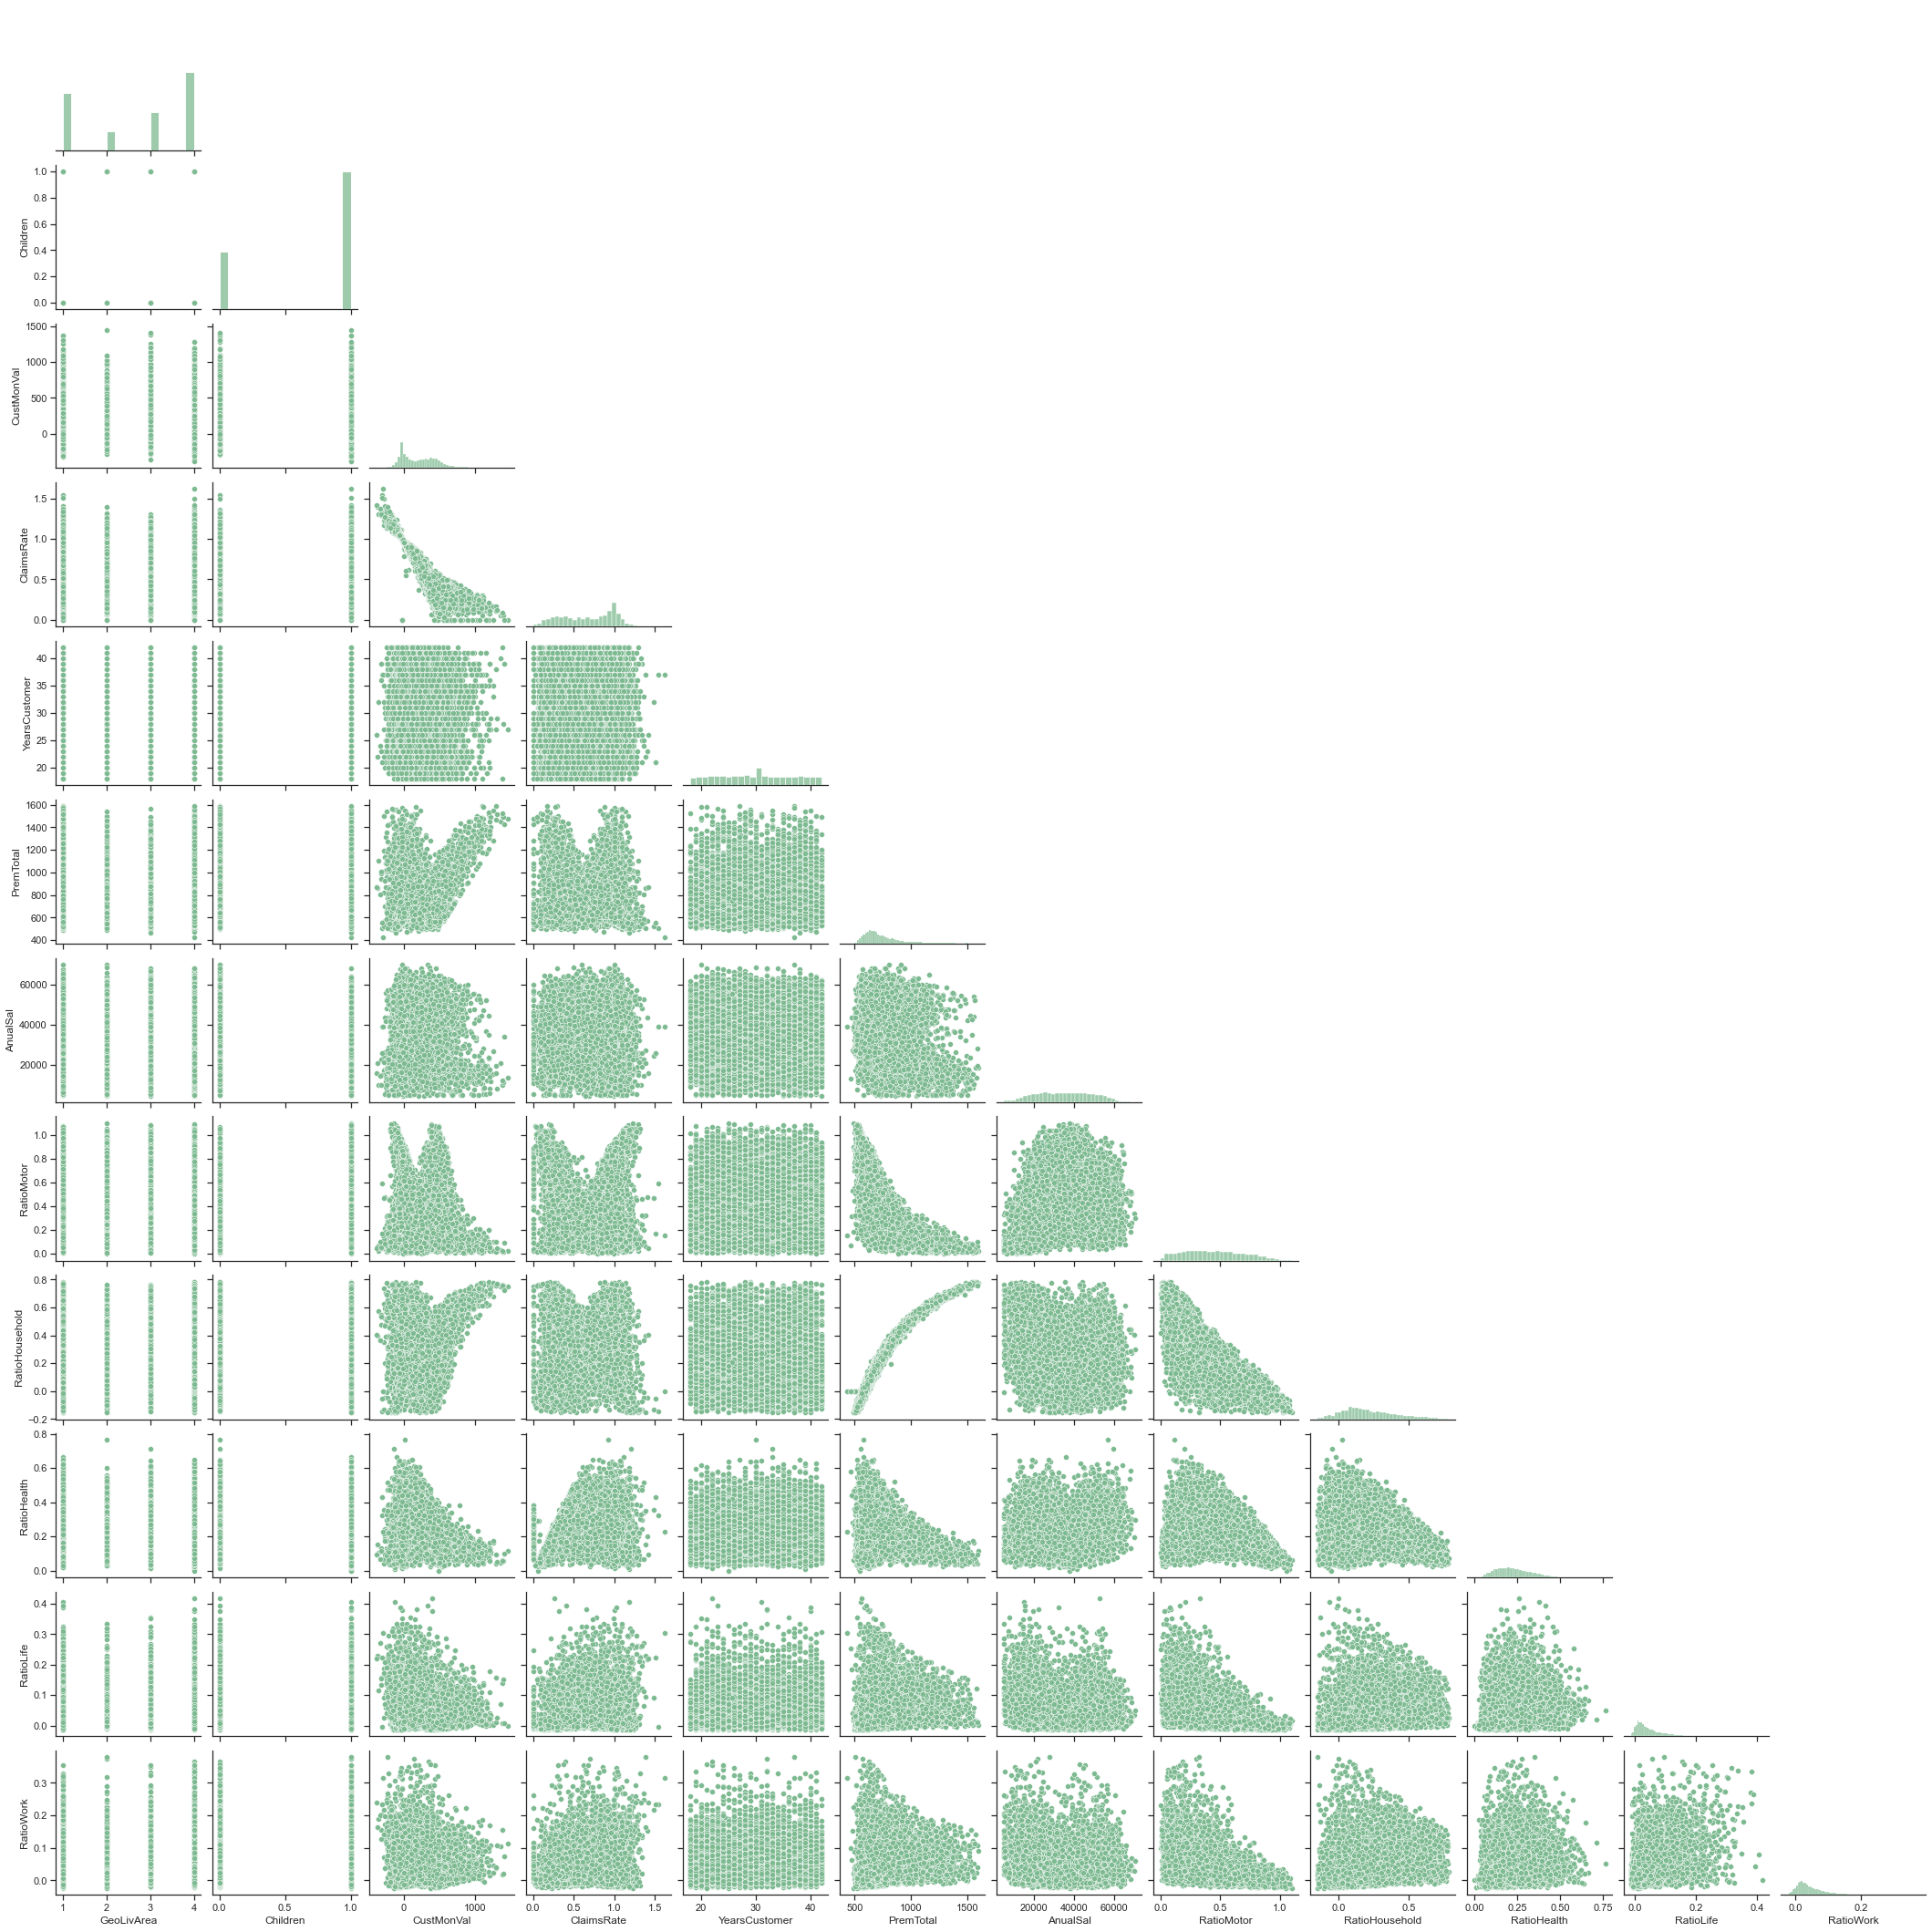

In [256]:
# In order to analyse the importance of detailed variables, we decided
# to perform some new visualizations
sns.set_theme(style="ticks", palette = "crest")
plt.figure(figsize=(10,10))

sns.pairplot(df, corner=True, palette = "husl")

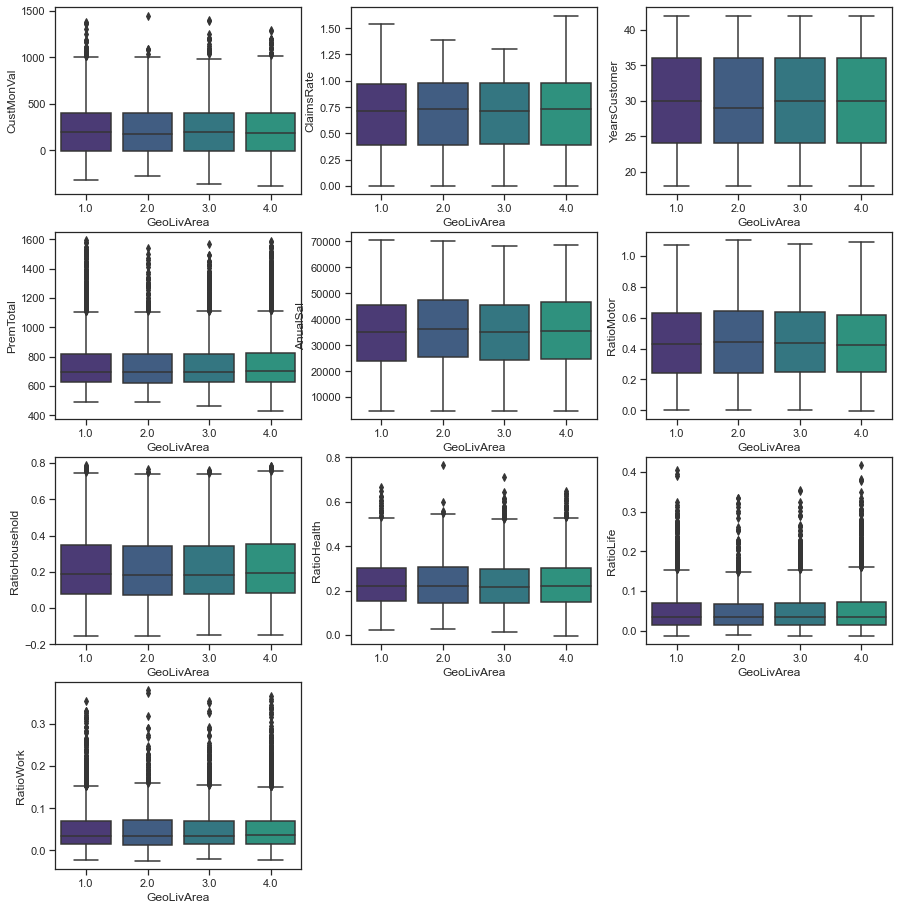

In [257]:
sns.set_theme(style="ticks", palette = "viridis")
plt.figure(figsize=(15,20))

for i, c in enumerate(df[metric_features], 1):
    plt.subplot(5,3,i) 
    g = sns.boxplot(x="GeoLivArea", y=c,data=df)


GeoLivArea has no discrimate power  - will not be considered in the clusterinh phase

In [258]:
# Remove GeoLivArea from our variables
df.drop(["GeoLivArea"], axis = 1, inplace = True)

In [259]:
for i in ["GeoLivArea"]:
    non_metric_features.remove(i)

<hr>
<a class="anchor" id="exploration">
    
# 4. Redo Data Exploration
    
</a>

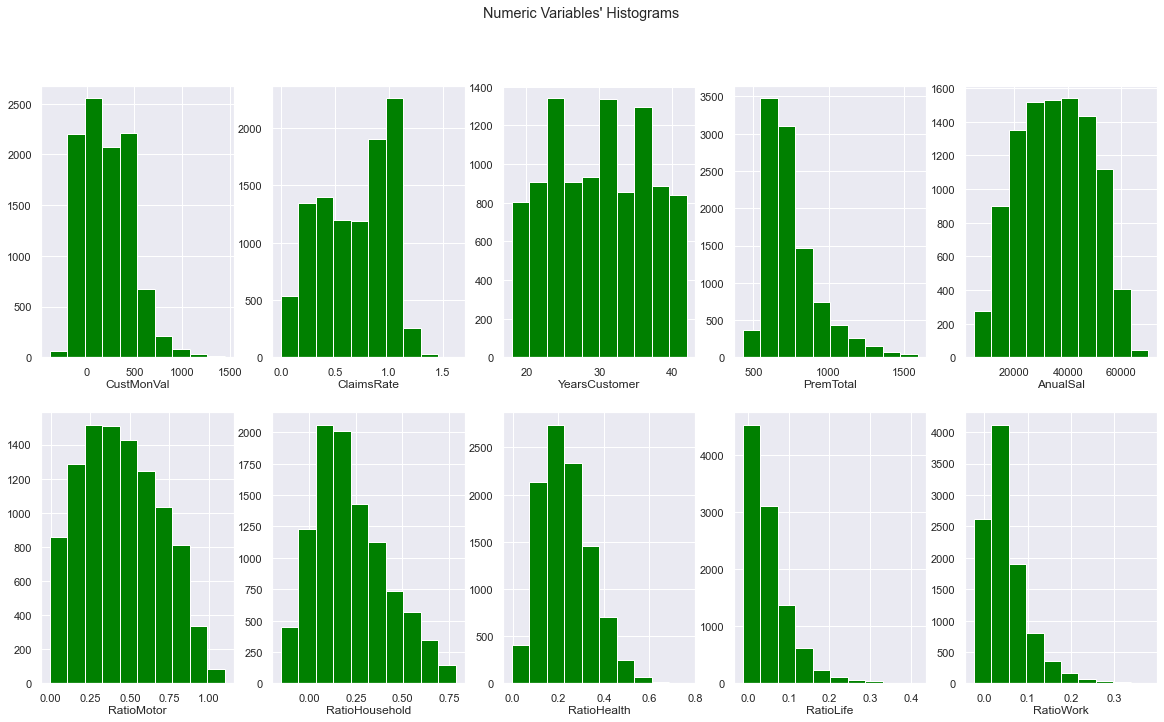

In [260]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat],   color = 'green')
    ax.set_title(feat, y=-0.13)
    

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

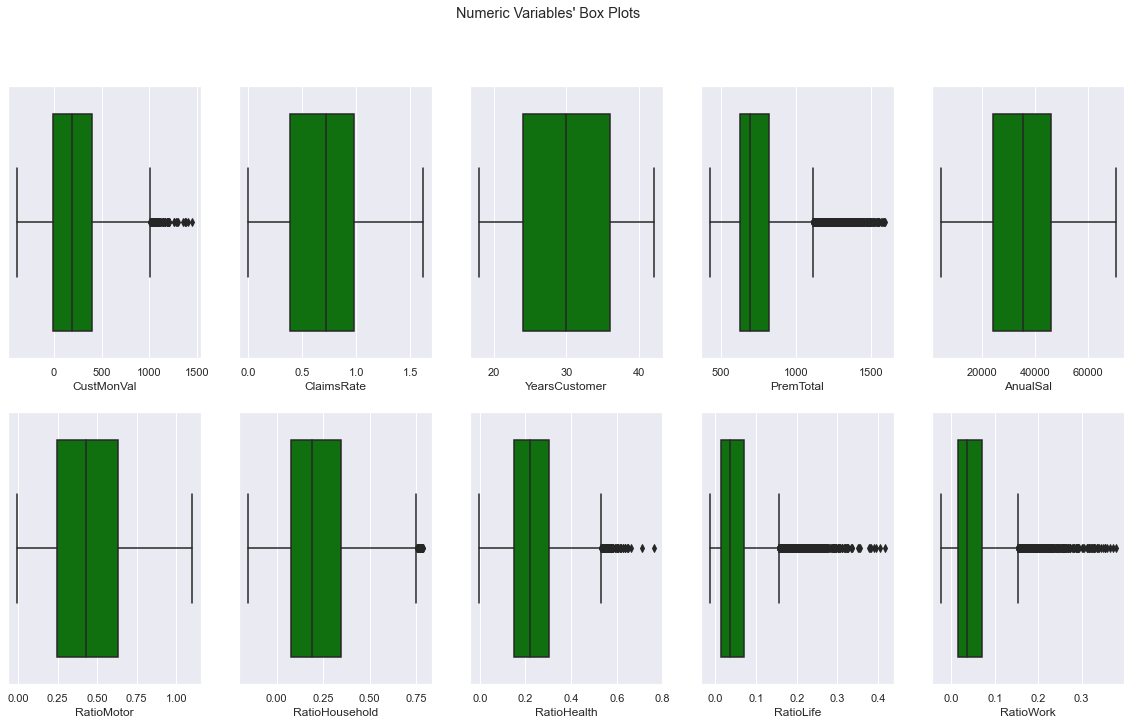

In [261]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(df[feat], ax=ax,   color = 'green')
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [262]:
## Count missing values
df.isna().sum()

EducDeg           0
Children          0
CustMonVal        0
ClaimsRate        0
YearsCustomer     0
PremTotal         0
AnualSal          0
RatioMotor        0
RatioHousehold    0
RatioHealth       0
RatioLife         0
RatioWork         0
dtype: int64

#### As we can see everything is okay. There is no extreme case of outlier that still needs to be treated, and also we have cleared our data set from all missing values that existed.

<hr>
<a class="anchor" id="scaling">
    
# 5. Feature Scaling
    
</a>

<hr>
<a class="anchor" id="minmax">
    
## 5.1. MinMaxScaler
    
</a>

In [263]:
df_minmax = df.copy()

In [264]:
# Scale the data using MinMax Scaler
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[metric_features])
scaled_feat

array([[0.41818846, 0.24074074, 0.54166667, ..., 0.29172559, 0.19557871,
        0.12383653],
       [0.13903274, 0.69135802, 0.70833333, ..., 0.17202724, 0.5278351 ,
        0.34984179],
       [0.48561975, 0.17283951, 0.29166667, ..., 0.22433361, 0.30247807,
        0.3924974 ],
       ...,
       [0.49621142, 0.12962963, 0.16666667, ..., 0.2713955 , 0.07362655,
        0.07831698],
       [0.34682141, 0.40123457, 0.70833333, ..., 0.3387691 , 0.22308799,
        0.42226631],
       [0.46331345, 0.16666667, 0.33333333, ..., 0.28006258, 0.0552355 ,
        0.10864404]])

In [265]:
df_minmax[metric_features] = scaled_feat
df_minmax.head()

EducDeg Children  CustMonVal  ClaimsRate  YearsCustomer  \
CustID                                                                       
1       b'2 - High School'      1.0    0.418188    0.240741       0.541667   
2       b'2 - High School'      1.0    0.139033    0.691358       0.708333   
3             b'1 - Basic'      0.0    0.485620    0.172840       0.291667   
4           b'3 - BSc/MSc'      1.0    0.201253    0.611111       0.333333   
5           b'3 - BSc/MSc'      1.0    0.229719    0.555556       0.500000   

        PremTotal  AnualSal  RatioMotor  RatioHousehold  RatioHealth  \
CustID                                                                 
1        0.203340  0.393345    0.515244        0.290240     0.291726   
2        0.414447  0.073379    0.081154        0.649275     0.172027   
3        0.267893  0.414676    0.256104        0.485720     0.224334   
4        0.147526  0.163396    0.279120        0.240024     0.680411   
5        0.172095  0.305034    0.491198        0.244063     0.383342   

        RatioLife  RatioWork  
CustID                        
1        0.195579   0.123837  
2        0.527835   0.349842  
3        0.302478   0.392497  
4        0.168137   0.177910  
5        0.100717   0.224272

In [266]:
df_minmax[metric_features].describe().round(2)

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  RatioMotor  \
count    10110.00    10110.00       10110.00   10110.00  10110.00    10110.00   
mean         0.33        0.42           0.50       0.28      0.47        0.41   
std          0.14        0.20           0.27       0.16      0.21        0.22   
min          0.00        0.00           0.00       0.00      0.00        0.00   
25%          0.21        0.24           0.25       0.17      0.30        0.22   
50%          0.31        0.44           0.50       0.23      0.47        0.39   
75%          0.43        0.60           0.75       0.34      0.63        0.58   
max          1.00        1.00           1.00       1.00      1.00        1.00   

       RatioHousehold  RatioHealth  RatioLife  RatioWork  
count        10110.00     10110.00   10110.00   10110.00  
mean             0.40         0.31       0.15       0.18  
std              0.21         0.14       0.12       0.13  
min              0.00         0.00       0.00       0.00  
25%              0.25         0.20       0.06       0.10  
50%              0.36         0.29       0.11       0.15  
75%              0.53         0.40       0.20       0.24  
max              1.00         1.00       1.00       1.00

<hr>
<a class="anchor" id="standard">
    
## 5.2. Standard Scaler
    
</a>

In [267]:
df_standard = df.copy()

In [268]:
# Scale the data using Standard Scaler
scaler_ss = StandardScaler().fit(df_standard[metric_features])
scaled_feat = scaler_ss.transform(df_standard[metric_features])
scaled_feat

array([[ 0.65607295, -0.91263301,  0.15523483, ..., -0.11315071,
         0.37608463, -0.47075953],
       [-1.38419787,  1.387501  ,  0.76140117, ..., -0.95980282,
         3.078463  ,  1.30373136],
       [ 1.14890931, -1.25922855, -0.75401468, ..., -0.58982862,
         1.24554125,  1.63864387],
       ...,
       [ 1.22632087, -1.47978934, -1.20863943, ..., -0.2569498 ,
        -0.61580267, -0.82815836],
       [ 0.1344712 , -0.0934072 ,  0.76140117, ...,  0.21959811,
         0.5998289 ,  1.87237587],
       [ 0.98587888, -1.29073723, -0.6024731 , ..., -0.1956457 ,
        -0.76538467, -0.59004401]])

In [269]:
df_standard[metric_features] = scaled_feat
df_standard.head()

EducDeg Children  CustMonVal  ClaimsRate  YearsCustomer  \
CustID                                                                       
1       b'2 - High School'      1.0    0.656073   -0.912633       0.155235   
2       b'2 - High School'      1.0   -1.384198    1.387501       0.761401   
3             b'1 - Basic'      0.0    1.148909   -1.259229      -0.754015   
4           b'3 - BSc/MSc'      1.0   -0.929450    0.977888      -0.602473   
5           b'3 - BSc/MSc'      1.0   -0.721399    0.694310       0.003693   

        PremTotal  AnualSal  RatioMotor  RatioHousehold  RatioHealth  \
CustID                                                                 
1       -0.463606 -0.348882    0.483669       -0.527923    -0.113151   
2        0.894121 -1.888633   -1.457421        1.202630    -0.959803   
3       -0.048431 -0.246232   -0.675110        0.414295    -0.589829   
4       -0.822568 -1.455450   -0.572190       -0.769964     2.636107   
5       -0.664554 -0.773853    0.376145       -0.750498     0.534872   

        RatioLife  RatioWork  
CustID                        
1        0.376085  -0.470760  
2        3.078463   1.303731  
3        1.245541   1.638644  
4        0.152888  -0.046198  
5       -0.395465   0.317813

In [270]:
df_standard[metric_features].describe().round(2)

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  RatioMotor  \
count    10110.00    10110.00       10110.00   10110.00  10110.00    10110.00   
mean        -0.00       -0.00           0.00       0.00      0.00        0.00   
std          1.00        1.00           1.00       1.00      1.00        1.00   
min         -2.40       -2.14          -1.81      -1.77     -2.24       -1.82   
25%         -0.90       -0.91          -0.91      -0.68     -0.80       -0.82   
50%         -0.12        0.13           0.00      -0.29      0.01       -0.06   
75%          0.72        0.95           0.91       0.39      0.80        0.75   
max          4.91        2.96           1.82       4.66      2.57        2.65   

       RatioHousehold  RatioHealth  RatioLife  RatioWork  
count        10110.00     10110.00   10110.00   10110.00  
mean            -0.00        -0.00      -0.00       0.00  
std              1.00         1.00       1.00       1.00  
min             -1.93        -2.18      -1.21      -1.44  
25%             -0.74        -0.77      -0.69      -0.67  
50%             -0.18        -0.12      -0.30      -0.28  
75%              0.64         0.64       0.38       0.40  
max              2.89         4.90       6.92       6.41

<hr>
<a class="anchor" id="robust">
    
## 5.3. Robust Scaler
    
</a>

In [271]:
df_robust = df.copy()

In [272]:
# Scale the data using Robust Scaler
scaler = RobustScaler()
scaled_feat = scaler.fit_transform(df_robust[metric_features])
scaled_feat

array([[ 0.47761799, -0.55932203,  0.08333333, ...,  0.00340118,
         0.63366394, -0.17387121],
       [-0.78071345,  0.6779661 ,  0.41666667, ..., -0.59887585,
         3.15591022,  1.47595682],
       [ 0.78157347, -0.74576271, -0.41666667, ..., -0.33568988,
         1.4451653 ,  1.78734081],
       ...,
       [ 0.82931684, -0.86440678, -0.66666667, ..., -0.09889218,
        -0.29210726, -0.50616179],
       [ 0.15592154, -0.11864407,  0.41666667, ...,  0.24010639,
         0.84249412,  2.00465249],
       [ 0.6810249 , -0.76271186, -0.33333333, ..., -0.05528271,
        -0.43171859, -0.28477563]])

In [273]:
df_robust[metric_features] = scaled_feat
df_robust.head()

EducDeg Children  CustMonVal  ClaimsRate  YearsCustomer  \
CustID                                                                       
1       b'2 - High School'      1.0    0.477618   -0.559322       0.083333   
2       b'2 - High School'      1.0   -0.780713    0.677966       0.416667   
3             b'1 - Basic'      0.0    0.781573   -0.745763      -0.416667   
4           b'3 - BSc/MSc'      1.0   -0.500249    0.457627      -0.333333   
5           b'3 - BSc/MSc'      1.0   -0.371934    0.305085       0.000000   

        PremTotal  AnualSal  RatioMotor  RatioHousehold  RatioHealth  \
CustID                                                                 
1       -0.160671 -0.224082    0.348812       -0.253870     0.003401   
2        1.103675 -1.189955   -0.888165        0.999978    -0.598876   
3        0.225949 -0.159691   -0.389631        0.428800    -0.335690   
4       -0.494944 -0.918223   -0.324044       -0.429238     1.959122   
5       -0.347798 -0.490663    0.280292       -0.415134     0.464381   

        RatioLife  RatioWork  
CustID                        
1        0.633664  -0.173871  
2        3.155910   1.475957  
3        1.445165   1.787341  
4        0.425345   0.220864  
5       -0.086457   0.559302

In [274]:
df_robust[metric_features].describe().round(2)

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  RatioMotor  \
count    10110.00    10110.00       10110.00   10110.00  10110.00    10110.00   
mean         0.07       -0.07          -0.00       0.27     -0.01        0.04   
std          0.62        0.54           0.55       0.93      0.63        0.64   
min         -1.41       -1.22          -1.00      -1.38     -1.41       -1.12   
25%         -0.48       -0.56          -0.50      -0.36     -0.50       -0.48   
50%          0.00        0.00           0.00      -0.00      0.00        0.00   
75%          0.52        0.44           0.50       0.64      0.50        0.52   
max          3.10        1.53           1.00       4.61      1.61        1.73   

       RatioHousehold  RatioHealth  RatioLife  RatioWork  
count        10110.00     10110.00   10110.00   10110.00  
mean             0.13         0.08       0.28       0.26  
std              0.72         0.71       0.93       0.93  
min             -1.27        -1.46      -0.85      -1.08  
25%             -0.41        -0.46      -0.36      -0.36  
50%             -0.00         0.00      -0.00       0.00  
75%              0.59         0.54       0.64       0.64  
max              2.22         3.57       6.74       6.22

In [275]:
# We decided to work with the standard normalization, since it standardizes
# the mean and standard deviation values as well
df = df_standard.copy()

<hr>
<a class="anchor" id="ohc">
    
# 6. One-Hot Encoding
    
</a>

In [276]:
df_ohc = df.copy()

In [277]:
# Create dummies for the categorical variables
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df

x0_1.0  x1_b'2 - High School'  x1_b'3 - BSc/MSc'  x1_b'4 - PhD'
CustID                                                                 
1          1.0                    1.0                0.0            0.0
2          1.0                    1.0                0.0            0.0
3          0.0                    0.0                0.0            0.0
4          1.0                    0.0                1.0            0.0
5          1.0                    0.0                1.0            0.0
...        ...                    ...                ...            ...
10292      0.0                    0.0                0.0            1.0
10293      0.0                    0.0                0.0            0.0
10294      1.0                    0.0                1.0            0.0
10295      1.0                    0.0                0.0            0.0
10296      1.0                    0.0                0.0            1.0

[10110 rows x 4 columns]

In [278]:
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc.head()

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  \
CustID                                                               
1         0.656073   -0.912633       0.155235  -0.463606 -0.348882   
2        -1.384198    1.387501       0.761401   0.894121 -1.888633   
3         1.148909   -1.259229      -0.754015  -0.048431 -0.246232   
4        -0.929450    0.977888      -0.602473  -0.822568 -1.455450   
5        -0.721399    0.694310       0.003693  -0.664554 -0.773853   

        RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  x0_1.0  \
CustID                                                                          
1         0.483669       -0.527923    -0.113151   0.376085  -0.470760     1.0   
2        -1.457421        1.202630    -0.959803   3.078463   1.303731     1.0   
3        -0.675110        0.414295    -0.589829   1.245541   1.638644     0.0   
4        -0.572190       -0.769964     2.636107   0.152888  -0.046198     1.0   
5         0.376145       -0.750498     0.534872  -0.395465   0.317813     1.0   

        x1_b'2 - High School'  x1_b'3 - BSc/MSc'  x1_b'4 - PhD'  
CustID                                                           
1                         1.0                0.0            0.0  
2                         1.0                0.0            0.0  
3                         0.0                0.0            0.0  
4                         0.0                1.0            0.0  
5                         0.0                1.0            0.0

In [279]:
# Rename the new created variables, to get more understadable names
df_ohc.rename(columns={"x0_1.0": "Children", "x1_b'2 - High School'":"High_School", "x1_b'3 - BSc/MSc'":"BSc/MSc", "x1_b'4 - PhD'":"PhD"},inplace = True)

In [280]:
df = df_ohc.copy()

<hr>
<a class="anchor" id="dbscan_outliers">
    
# 7. DBSCAN - detection of remaining outliers in our dataset
    
</a>

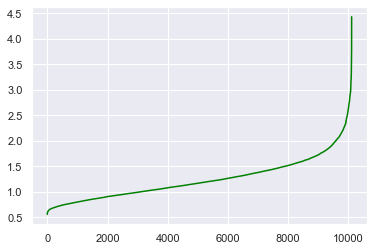

In [281]:
# Create the K-distance graph to find out
# the rigth epsilon value to work with
neigh = NearestNeighbors(n_neighbors = (2 * len(metric_features)) - 1)
neigh.fit(df[metric_features])
distances, _ = neigh.kneighbors(df[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances, color = 'green')
plt.show()

In [282]:
# Perform DBSCAN clustering, after analysing the previous graphs
# with an epsilon of 1.8 (elbow) , and a min_samples equivalent to double 
# of the total number of metric features that we have
dbscan = DBSCAN(eps=1.8, min_samples = 2 * len(metric_features), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(df[metric_features])

Counter(dbscan_labels)

Counter({0: 9838, -1: 272})

In [283]:
df_dbscan = pd.concat([df, pd.Series(dbscan_labels, name = 'dbscan_labels', index = df.index)], axis =1)

In [284]:
# Save the newly detected outliers 
# so that, we can re-classifie them later 
df_out_new = df_dbscan[dbscan_labels==-1]

# Dataframe without outliers 
df = df_dbscan[dbscan_labels!=-1]

In [285]:
# Since we are working with a new dataframe, we need 
# to redo all the changes we did to the previous one
# so we can work with all the correct alterations we did until now
df_out.set_index('CustID', drop=True, inplace=True)
df_out.drop('index', axis=1, inplace=True)

df_out['YearsCustomer'] = 2016 - df_out['FirstPolYear']

df_out['PremTotal'] = df_out['PremMotor'] + df_out['PremHousehold'] + df_out['PremHealth'] + df_out['PremLife'] + df_out['PremWork']

df_out['AnualSal'] = 14 * df_out['MonthSal']

df_out['RatioMotor'] = df_out['PremMotor'] / df_out['PremTotal']

df_out['RatioHousehold'] = df_out['PremHousehold'] / df_out['PremTotal']

df_out['RatioHealth'] = df_out['PremHealth'] / df_out['PremTotal']

df_out['RatioLife'] = df_out['PremLife'] / df_out['PremTotal']

df_out['RatioWork'] = df_out['PremWork'] / df_out['PremTotal']

df_out.drop(["FirstPolYear", "MonthSal", "PremHousehold", "PremHealth", "PremMotor", "PremLife", "PremWork"], axis = 1, inplace = True)


# Normalize and create dummies for the outliers removed above with iqr 

out_feat = scaler_ss.transform(df_out[metric_features])
df_out[metric_features] = out_feat

ohc_feat_out = ohc.fit_transform(df_out[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
df_out_ = pd.DataFrame(ohc_feat_out, index=df_out.index, columns=ohc_feat_names)
df_out_.rename(columns={"x0_1.0": "Children", "x1_b'2 - High School'":"High_School", "x1_b'3 - BSc/MSc'":"BSc/MSc", "x1_b'4 - PhD'":"PhD"},inplace = True)
df_out = pd.concat([df_out.drop(non_metric_features, axis=1), df_out_], axis=1)
df_out.drop('GeoLivArea', axis=1, inplace=True)

In [286]:
# Aggregate iqr and dbscan outliers 
df_out = pd.concat([df_out, df_out_new.drop('dbscan_labels', axis=1)], axis=0)

In [287]:
df_out

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  \
CustID                                                               
15       -1.216347    1.387501       0.458318  -1.185956 -0.550076   
54       -0.906900    0.946379       0.458318   0.194289 -1.405151   
116       0.455034   -0.629055      -0.299390  -0.395277 -0.700972   
140       1.726608   -1.353755       1.216026   0.825737  0.722786   
155       1.039505   -1.763368      -1.663264  -0.997235 -0.188747   
...            ...         ...            ...        ...       ...   
10161    -1.583444    1.608062      -0.602473   0.378251 -1.624823   
10214    -0.164338   -0.219442      -0.299390  -1.296002  0.834674   
10264    -1.134035    1.229958       0.155235  -0.556998 -1.648432   
10270    -1.690099    2.080692      -0.602473  -1.133063 -0.676336   
10293     4.738328   -2.141472       1.367568   3.769138 -0.088150   

        RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  \
CustID                                                                  
15        2.013889       -1.810885    -0.886393  -0.574992  -0.350165   
54       -0.885426        0.407115     1.333965   0.103865  -0.209066   
116       0.343187       -0.177533     0.410771  -0.879400  -0.939360   
140      -0.359703        0.854259    -0.155500  -0.319032  -0.856574   
155       1.841312       -1.230099    -1.186667  -0.830744  -0.828059   
...            ...             ...          ...        ...        ...   
10161    -1.588123        0.825148     0.835505  -0.484420   3.242940   
10214    -0.806253       -1.836789     1.231245   3.439443   4.715023   
10264    -1.317609       -0.481168     3.788263   0.702472  -0.554562   
10270    -0.496701       -1.521813     2.196858   3.985197  -0.571577   
10293    -1.423663        2.572256    -1.217672  -0.789601   0.466071   

        Children  High_School  BSc/MSc  PhD  
CustID                                       
15           1.0          1.0      0.0  0.0  
54           1.0          1.0      0.0  0.0  
116          1.0          1.0      0.0  0.0  
140          1.0          1.0      0.0  0.0  
155          0.0          0.0      1.0  0.0  
...          ...          ...      ...  ...  
10161        1.0          1.0      0.0  0.0  
10214        0.0          1.0      0.0  0.0  
10264        0.0          1.0      0.0  0.0  
10270        1.0          1.0      0.0  0.0  
10293        0.0          0.0      0.0  0.0  

[453 rows x 14 columns]

<hr>
<a class="anchor" id="clustering">
    
# 8. Clustering Methods
    
</a>

### Spliting our features into perspectives

In [288]:
# Split all the variables between three workable perspectives
# These perspectives are the ones to work on when applying the clustering methods
personal_features = ['AnualSal', 'Children', 'High_School', 'BSc/MSc', 'PhD']

prem_features = ['RatioMotor', 'RatioHousehold', 'RatioHealth', 'RatioLife', 'RatioWork']

demographic_financial_features = ['CustMonVal', 'ClaimsRate', 'PremTotal']

df_personal = df[personal_features]
df_prem = df[prem_features]
df_dem_fin = df[demographic_financial_features]

### Defining cluster profiles for posterior analysis

In [289]:
# Create a function that will show us, the profile of each cluster after 
# creating the clusters with each of the studied methods
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

<hr>
<a class="anchor" id="kprototypes">
    
## 8.1 K-Prototypes clustering
    
</a>

### Personal perspective

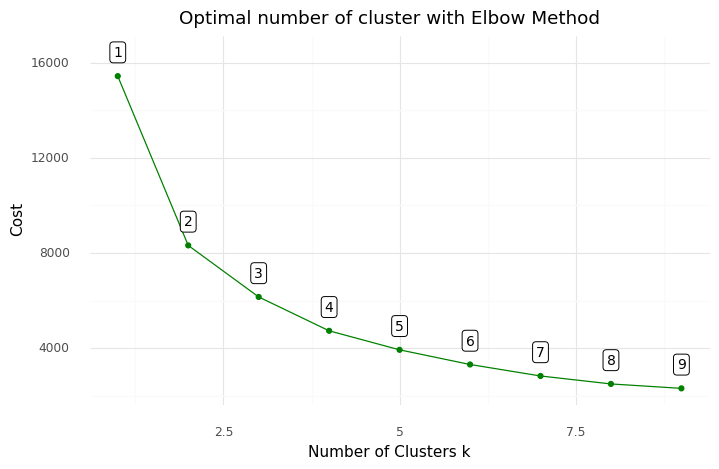

<ggplot: (124429514141)>

In [290]:
# Adapted from https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

# Choose optimal K using Elbow method
#cost = []
#for cluster in range(1, 10):
#    try:
#        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 93)
#        kprototype.fit_predict(df_personal, categorical = [1,2,3,4])
#        cost.append(kprototype.cost_)
#        print('Cluster initiation: {}'.format(cluster))
#    except:
#        break

cost = [15443.573619090304,
 8320.667606761395,
 6152.089461297907,
 4726.948786812976,
 3926.7190765700707,
 3310.069689395832,
 2826.587754058086,
 2491.692195490012,
 2305.0800653293813]

# Convert the results into a dataframe
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
# Data visualization
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'), color = 'green')+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'), color = 'green')+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

##### After analyzing the graphic above, we decided that the most suitable cluster number are 2 or 3

In [291]:
k2prot = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 93)
k2prot_labels = k2prot.fit_predict(df_personal, categorical = [1,2,3,4])

In [292]:
k3prot = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 93)
k3prot_labels = k3prot.fit_predict(df_personal, categorical = [1,2,3,4])

In [293]:
df_personal = pd.concat([df_personal, pd.Series(k2prot_labels, name='k2prot_labels', index=df_personal.index), 
                     pd.Series(k3prot_labels, name='k3prot_labels', index=df_personal.index)], axis=1)

In [294]:
df_personal.groupby('k2prot_labels')[personal_features].mean()

AnualSal  Children  High_School   BSc/MSc       PhD
k2prot_labels                                                     
0              0.957463  0.446542     0.301392  0.561246  0.069153
1             -0.701767  0.907517     0.371184  0.418318  0.071773

In [295]:
df_personal.groupby('k3prot_labels')[personal_features].mean()

AnualSal  Children  High_School   BSc/MSc       PhD
k3prot_labels                                                     
0             -1.068516  0.881272     0.410735  0.334306  0.074679
1              0.144202  0.899973     0.235263  0.659109  0.052281
2              1.220756  0.217963     0.400601  0.414882  0.091319

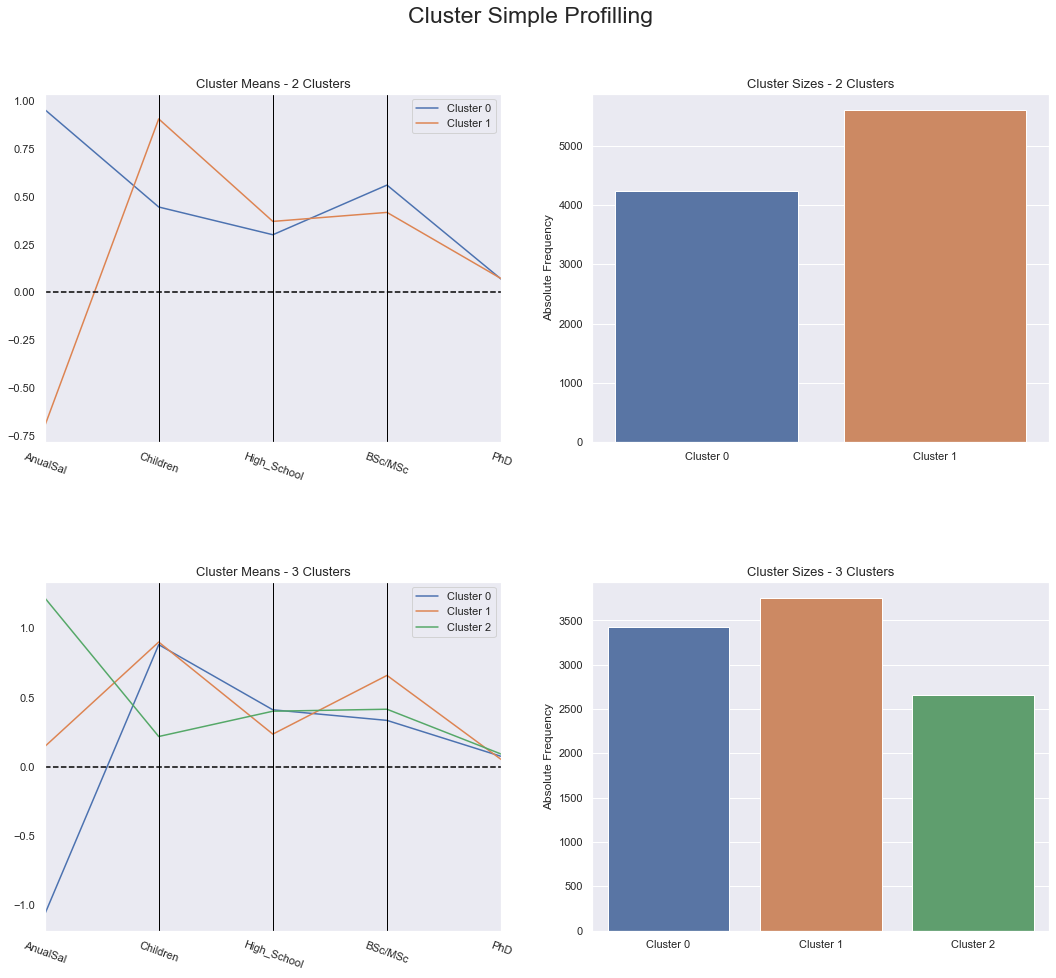

In [296]:
cluster_profiles(df_personal, ['k2prot_labels', 'k3prot_labels'], (18, 15))

##### After analyzing each one of the solutions perfomed, we decided to keep the one which segments the data into 3 clusters

<hr>
<a class="anchor" id="kmeans_hierchical">
    
## 8.2 K-Means + Hierarchical clustering
    
</a>

In [297]:
# Create a function to compute the r squared for each linkage method used in hierarchical clustering
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=1, max_k=13):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

In [298]:
# Obtaining the R² scores for each cluster solution
def r2_scores(dataframe):
    r2_scores = {}

    for linkage in ['complete', 'average', 'single', 'ward']:
        r2_scores[linkage] = get_r2_scores(dataframe, hierarchical.set_params(linkage=linkage))  
    
    return pd.DataFrame(r2_scores)

### Premiums Perspective

In [299]:
# Initialize the K-Means method, with a high number of initial clusters
kmeans_prem = KMeans(n_clusters=35, init = 'k-means++', n_init=20, random_state=93)
km_prem_labels = kmeans_prem.fit_predict(df_prem)

In [300]:
df_km_prem = pd.concat([df_prem, pd.Series(km_prem_labels, name='km_prem_labels', index=df_prem.index)], axis=1)

In [301]:
# the best linkage is ward

#value_r2_scores = r2_scores(df_prem)

# Visualizing the R² scores for each cluster solution on value variables
#value_r2_scores.plot.line(figsize=(10,7))

#plt.title("Value Variables:\nR² plot for various clustering methods\n", fontsize=21)
#plt.legend(title="Cluster methods", title_fontsize=11)
#plt.xlabel("Number of clusters", fontsize=13)
#plt.ylabel("R² metric", fontsize=13)
#plt.show()

In [302]:
# Take the centroids from the previous clusters
centroids = pd.DataFrame(kmeans_prem.cluster_centers_, columns = df_prem.columns)

In [303]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)

hclust_labels = hclust.fit_predict(centroids)

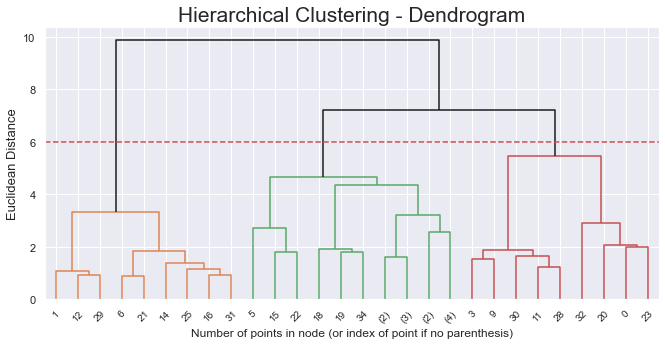

In [304]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 6
dendrogram(linkage_matrix, truncate_mode='level', labels=centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [305]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(centroids)
centroids['hclust_labels'] = hclust_labels

centroids  # centroid's cluster labels

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  \
0    -0.376858       -0.551982     0.835638  -0.207414   2.358765   
1     1.522696       -1.322160    -0.518745  -0.621698  -0.570794   
2    -1.129510        1.169809     0.320335  -0.312342   0.637789   
3     0.312776       -1.019183     1.490766  -0.402267  -0.368310   
4    -0.544873        0.745977     0.303355  -0.391925  -0.448164   
5    -0.530249       -0.281251     0.762996   2.272743  -0.330955   
6     0.614638       -0.086605    -0.883818  -0.475191  -0.273377   
7    -1.030705        1.331883    -0.191501   0.725825  -0.441090   
8    -0.917461        0.997084    -0.464011   0.805844   0.778516   
9    -0.154297       -0.855117     1.322650   0.864358   0.307350   
10   -1.419362        2.216789    -1.085082   0.536053   0.150749   
11   -0.706544       -0.077137     1.529681  -0.307704   0.779604   
12    2.085357       -1.429117    -1.343561  -0.846472  -0.899125   
13   -1.068911        1.899364    -0.623226  -0.438466  -0.302244   
14    0.595064       -0.852892     0.047681  -0.033618   0.309485   
15   -1.448123        1.931276    -0.955872   1.843741  -0.245515   
16    0.147943       -0.351301     0.799916  -0.490706  -0.561736   
17   -0.061321        0.617394    -0.720210   0.013784  -0.543025   
18   -1.490349        1.667138    -1.076817   1.349953   1.724511   
19   -1.413804        2.067506    -0.985563  -0.393022   1.437190   
20   -1.040810       -0.400529     1.543265   1.489743   1.737323   
21    1.021011       -0.601906    -0.587600  -0.647636  -0.719883   
22   -1.110756        0.729872    -0.356296   2.566225   0.683895   
23   -0.070612       -0.439808    -0.145392   1.069497   1.216151   
24   -1.033876        0.534812     0.928014   0.827535   0.132591   
25    0.925710       -1.044661     0.353556  -0.570150  -0.646912   
26   -0.253472        0.015647     0.460427  -0.251728   0.447208   
27   -0.283356        0.677523    -0.599319  -0.436675   0.505507   
28   -0.634496        0.136174     1.502278  -0.218835  -0.410827   
29    1.479836       -0.726135    -1.286707  -0.812191  -0.810383   
30   -0.562012       -0.733221     2.643760  -0.015707  -0.077323   
31    0.412583       -0.202463    -0.055523  -0.541573  -0.541754   
32   -1.270996        0.383168    -0.196553   2.471122   2.532274   
33   -0.080447       -0.000243     0.002418   0.657362  -0.293748   
34   -1.037641        0.804117    -0.117032   0.026396   2.159366   

    hclust_labels  
0               0  
1               1  
2               2  
3               0  
4               2  
5               2  
6               1  
7               2  
8               2  
9               0  
10              2  
11              0  
12              1  
13              2  
14              1  
15              2  
16              1  
17              2  
18              2  
19              2  
20              0  
21              1  
22              2  
23              0  
24              2  
25              1  
26              2  
27              2  
28              0  
29              1  
30              0  
31              1  
32              0  
33              2  
34              2

In [306]:
# Mapper between concatenated hierarchical clusters
cluster_mapper = centroids['hclust_labels'].to_dict()

# Mapping the hierarchical clusters on the centroids to the observations
df_km_prem['kmeans_labels'] = df_km_prem.apply(
    lambda row: cluster_mapper[(row['km_prem_labels'])], axis=1)

df_km_prem.drop('km_prem_labels', axis=1, inplace=True)

In [307]:
df_km_prem.groupby('kmeans_labels').mean()

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork
kmeans_labels                                                               
0               -0.421290       -0.406347     1.348511   0.253928   0.461602
1                0.969099       -0.695173    -0.404367  -0.585302  -0.566950
2               -0.779653        0.944951    -0.195653   0.330132   0.236387

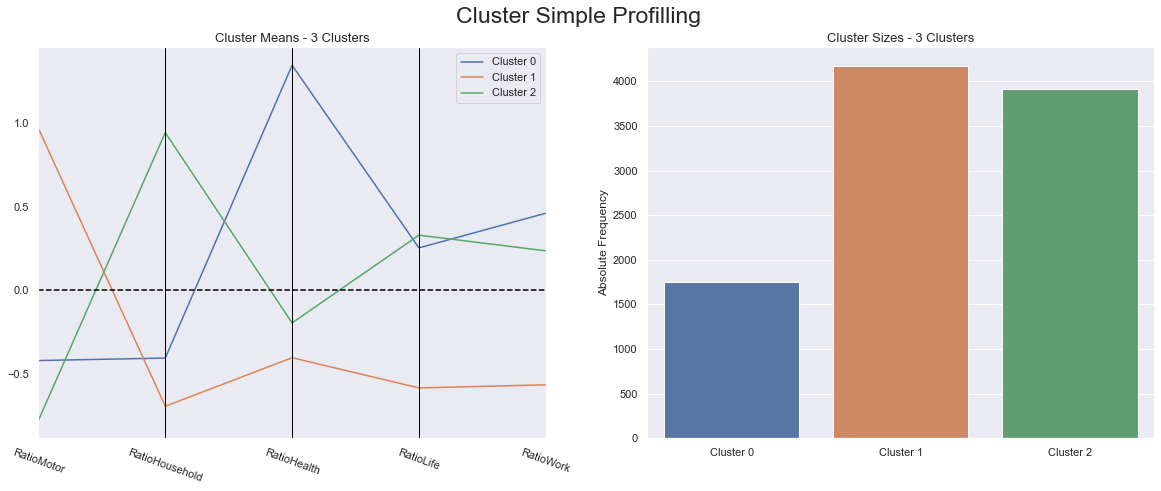

In [308]:
cluster_profiles(df_km_prem, ['kmeans_labels'], (20,7))

### Demographic/Financial Perspective

In [309]:
# Initialize the K-Means method, with a high number of initial clusters
kmeans_dem = KMeans(n_clusters=35, init = 'k-means++', n_init=20, random_state=93)
km_dem_labels = kmeans_dem.fit_predict(df_dem_fin)

In [310]:
df_km_dem = pd.concat([df_dem_fin, pd.Series(km_dem_labels, name='km_dem_labels', index=df_dem_fin.index)], axis=1)

In [311]:
# the best linkage is ward

#value_r2_scores = r2_scores(df_dem_fin)

# Visualizing the R² scores for each cluster solution on value variables
#value_r2_scores.plot.line(figsize=(10,7))

#plt.title("Value Variables:\nR² plot for various clustering methods\n", fontsize=21)
#plt.legend(title="Cluster methods", title_fontsize=11)
#plt.xlabel("Number of clusters", fontsize=13)
#plt.ylabel("R² metric", fontsize=13)
#plt.show()

In [312]:
# Take the centroids from the previous clusters
centroids = pd.DataFrame(kmeans_dem.cluster_centers_, columns = df_dem_fin.columns)

In [313]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)

hclust_labels = hclust.fit_predict(centroids)

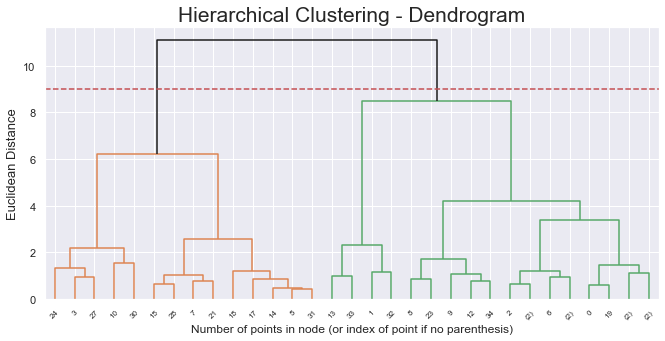

In [314]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 9
dendrogram(linkage_matrix, truncate_mode='level', labels=centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [315]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=2
)
hclust_labels = hclust.fit_predict(centroids)
centroids['hclust_labels'] = hclust_labels

centroids  # centroid's cluster labels

CustMonVal  ClaimsRate  PremTotal  hclust_labels
0    -0.080376   -0.154667  -0.793236              0
1     2.887946   -1.386839   2.905257              0
2     1.277009   -1.728056  -0.558322              0
3    -0.724659    0.838473   1.945516              1
4     0.582398   -0.571197   0.131175              0
5    -1.009519    1.065885  -0.439418              1
6     0.416196   -0.892894  -0.967086              0
7    -0.651869    0.719445   0.538341              1
8     0.826543   -0.395991   1.448117              0
9     1.981353   -1.503702   0.996307              0
10   -0.869886    0.959534   3.494663              1
11    0.104251   -0.037451   0.339847              0
12    1.470163   -1.428371   0.226992              0
13    2.447301   -1.460517   1.911598              0
14   -0.740581    0.730342  -0.649218              1
15   -0.959420    1.007423   0.017684              1
16    0.621187   -0.851694  -0.414988              0
17   -0.502233    0.483803  -0.311881              1
18   -1.266647    1.453922  -1.110703              1
19    0.246850   -0.388220  -0.345882              0
20    0.849589   -1.271026  -0.668544              0
21   -1.010984    1.051252   1.138744              1
22    0.481594   -0.282195   0.758137              0
23    1.519946   -0.915848   1.509371              0
24   -0.122235    0.325641   1.236923              1
25   -0.173361    0.168122  -0.027289              0
26    1.012457   -1.154235  -0.143637              0
27   -0.147884    0.478859   2.618535              1
28   -1.284356    1.320983   0.469144              1
29    0.900257   -1.611428  -1.024582              0
30   -1.535032    1.414809   2.165048              1
31   -0.989096    1.047413  -0.870094              1
32    3.608091   -1.519330   3.785377              0
33    1.846795   -0.869640   2.416691              0
34    1.137603   -0.892837   0.687874              0

In [316]:
# Mapper between concatenated and hierarchical clusters
cluster_mapper = centroids['hclust_labels'].to_dict()

# Mapping the hierarchical clusters on the centroids to the observations
df_km_dem['kmeans_labels'] = df_km_dem.apply(
    lambda row: cluster_mapper[(row['km_dem_labels'])], axis=1)

df_km_dem.drop('km_dem_labels', axis=1, inplace=True)

In [317]:
df_km_dem.groupby('kmeans_labels').mean()

CustMonVal  ClaimsRate  PremTotal
kmeans_labels                                   
0                0.761694   -0.805096   0.041810
1               -0.857377    0.912545  -0.032453

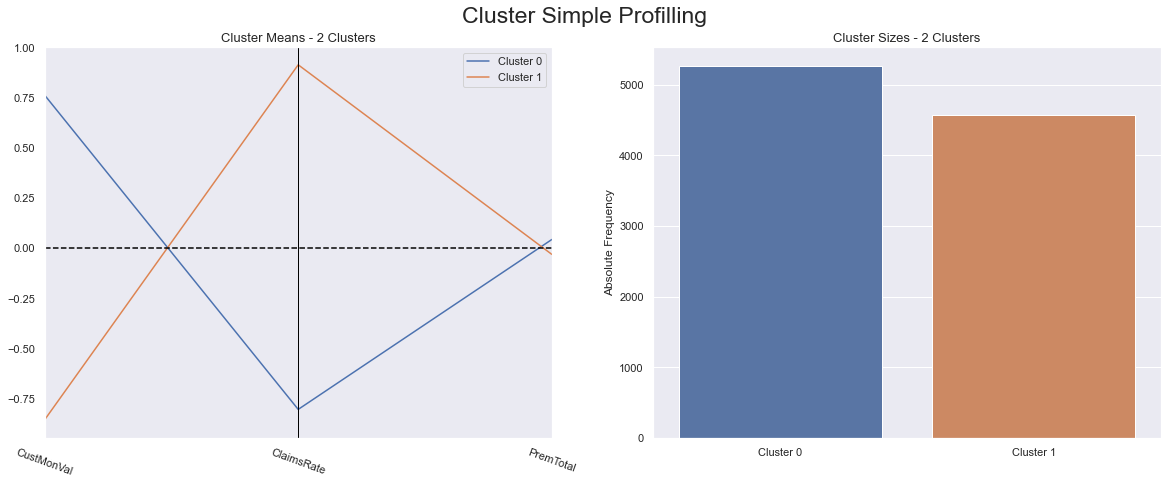

In [318]:
cluster_profiles(df_km_dem, ['kmeans_labels'], (20,7))

<hr>
<a class="anchor" id="som_hier">
    
## 8.3 Self Organizing Maps + Hierarchical
    
</a>

### Premiums Perspective

In [319]:
# Select an initial number of initial seeds, based on the random state
# defined in the previous cluster methods
np.random.seed(93)

sm_prem = sompy.SOMFactory().build(
    df_prem.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=prem_features
)

# Define a certain number of epochs so, the SOM algorithm converge
sm_prem.train(n_job=-1, verbose='info', train_rough_len=150, train_finetune_len=150)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.166667, trainlen: 150

 epoch: 1 ---> elapsed time:  0.114000, quantization error: 1.079356

 epoch: 2 ---> elapsed time:  0.101000, quantization error: 2.044152

 epoch: 3 ---> elapsed time:  0.110000, quantization error: 1.984228

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.952267

 epoch: 5 ---> elapsed time:  0.105000, quantization error: 1.919122

 epoch: 6 ---> elapsed time:  0.103000, quantization error: 1.912347

 epoch: 7 ---> elapsed time:  0.099000, quantization error: 1.904988

 epoch: 8 ---> elapsed time:  0.096000, quantization error: 1.892455

 epoch: 9 ---> elapsed time:  0.110000, quantization error: 1.880377

 epoch: 10 ---> elapsed time:  0.092000, quantization error: 1.874763

 epoch: 11 ---> elapsed time:  0.104000, quantization error: 1.872152

 epoch: 12 ---> elapsed time:  0.101000, quantization error: 1.869899

 epoch: 13 ---> 

 epoch: 115 ---> elapsed time:  0.102000, quantization error: 1.294767

 epoch: 116 ---> elapsed time:  0.088000, quantization error: 1.282928

 epoch: 117 ---> elapsed time:  0.098000, quantization error: 1.270984

 epoch: 118 ---> elapsed time:  0.100000, quantization error: 1.258858

 epoch: 119 ---> elapsed time:  0.089000, quantization error: 1.246636

 epoch: 120 ---> elapsed time:  0.090000, quantization error: 1.234131

 epoch: 121 ---> elapsed time:  0.098000, quantization error: 1.221564

 epoch: 122 ---> elapsed time:  0.100000, quantization error: 1.208822

 epoch: 123 ---> elapsed time:  0.098000, quantization error: 1.195994

 epoch: 124 ---> elapsed time:  0.107000, quantization error: 1.183045

 epoch: 125 ---> elapsed time:  0.110000, quantization error: 1.169921

 epoch: 126 ---> elapsed time:  0.103000, quantization error: 1.156631

 epoch: 127 ---> elapsed time:  0.116000, quantization error: 1.143060

 epoch: 128 ---> elapsed time:  0.102000, quantization error: 1.

 epoch: 79 ---> elapsed time:  0.110000, quantization error: 0.825088

 epoch: 80 ---> elapsed time:  0.116000, quantization error: 0.822963

 epoch: 81 ---> elapsed time:  0.114000, quantization error: 0.820837

 epoch: 82 ---> elapsed time:  0.099000, quantization error: 0.818800

 epoch: 83 ---> elapsed time:  0.099000, quantization error: 0.816801

 epoch: 84 ---> elapsed time:  0.109000, quantization error: 0.814726

 epoch: 85 ---> elapsed time:  0.101000, quantization error: 0.812581

 epoch: 86 ---> elapsed time:  0.091000, quantization error: 0.810502

 epoch: 87 ---> elapsed time:  0.094000, quantization error: 0.808417

 epoch: 88 ---> elapsed time:  0.104000, quantization error: 0.806343

 epoch: 89 ---> elapsed time:  0.096000, quantization error: 0.804343

 epoch: 90 ---> elapsed time:  0.108000, quantization error: 0.802359

 epoch: 91 ---> elapsed time:  0.103000, quantization error: 0.800336

 epoch: 92 ---> elapsed time:  0.106000, quantization error: 0.798291

 epoch

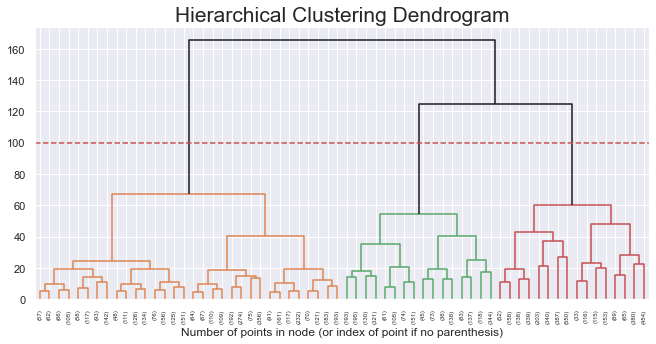

In [320]:
# let's see the best number of cluster for hierarchical
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_prem)


counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)


sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

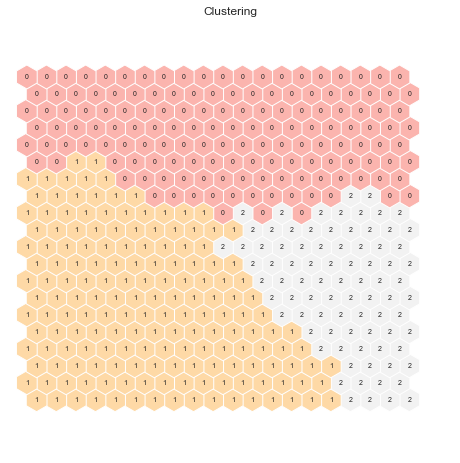

In [321]:
# Perform Hierarchical on top of Som algorithm
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_prem.codebook.matrix)
sm_prem.cluster_labels = nodeclus_labels  

hits  = HitMapView(8, 8,"Clustering",text_size=10)
hits.show(sm_prem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [322]:
# Check the nodes with the respective cluster to which it belongs
nodes_prem = sm_prem.codebook.matrix

nodesh_prem = pd.DataFrame(nodes_prem, columns=prem_features)
nodesh_prem['som_h_label'] = nodeclus_labels
nodesh_prem

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  \
0     -0.570195       -0.569335     2.415268  -0.131700  -0.057947   
1     -0.628131       -0.302811     2.126698  -0.213298  -0.122470   
2     -0.597743       -0.135768     1.853617  -0.394937  -0.176475   
3     -0.385491       -0.272412     1.720156  -0.453165  -0.371201   
4     -0.123805       -0.519310     1.611995  -0.469443  -0.461338   
..          ...             ...          ...        ...        ...   
395   -1.015845        1.473411    -0.081351  -0.377096  -0.242015   
396   -0.927380        1.172631     0.242806  -0.313993  -0.263608   
397   -0.850488        0.890805     0.558643  -0.282971  -0.251431   
398   -0.822335        0.696778     0.801154  -0.101938  -0.328529   
399   -0.873899        0.632613     0.929557   0.204423  -0.384086   

     som_h_label  
0              2  
1              2  
2              2  
3              2  
4              1  
..           ...  
395            0  
396            0  
397            0  
398            0  
399            0  

[400 rows x 6 columns]

In [323]:
# Obtaining BMUs
bmus_map_prem = sm_prem.find_bmu(df_prem[prem_features])[0] 

df_bmus_prem = pd.DataFrame(
    np.concatenate((df_prem[prem_features], np.expand_dims(bmus_map_prem,1)), axis=1),
    index=df_prem.index, columns=np.append(df_prem[prem_features].columns,"BMU")
)
df_bmus_prem

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork    BMU
CustID                                                                      
1         0.483669       -0.527923    -0.113151   0.376085  -0.470760  172.0
2        -1.457421        1.202630    -0.959803   3.078463   1.303731  360.0
3        -0.675110        0.414295    -0.589829   1.245541   1.638644  343.0
4        -0.572190       -0.769964     2.636107   0.152888  -0.046198   20.0
5         0.376145       -0.750498     0.534872  -0.395465   0.317813  128.0
...            ...             ...          ...        ...        ...    ...
10291    -1.780109        2.317524    -1.411077   0.681010   2.043295  384.0
10292     0.681995       -0.744791     0.357281  -0.671676  -0.516317   70.0
10294     0.544432       -0.161999    -0.256950  -0.615803  -0.828158  239.0
10295    -0.816695        0.257124     0.219598   0.599829   1.872376  201.0
10296     0.701068       -0.416710    -0.195646  -0.765385  -0.590044  219.0

[9838 rows x 6 columns]

In [324]:
# Get cluster labels for each observation
df_somf_prem = df_bmus_prem.merge(nodesh_prem['som_h_label'], 'left', left_on="BMU", right_index=True)

df_somf_prem.drop('BMU', axis=1, inplace=True)

In [325]:
df_somf_prem.groupby('som_h_label').mean()

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork
som_h_label                                                               
0             -0.872374        1.018805    -0.179794   0.447750   0.247529
1              0.919762       -0.683487    -0.340353  -0.549667  -0.545768
2             -0.426810       -0.313010     1.234167   0.086457   0.547532

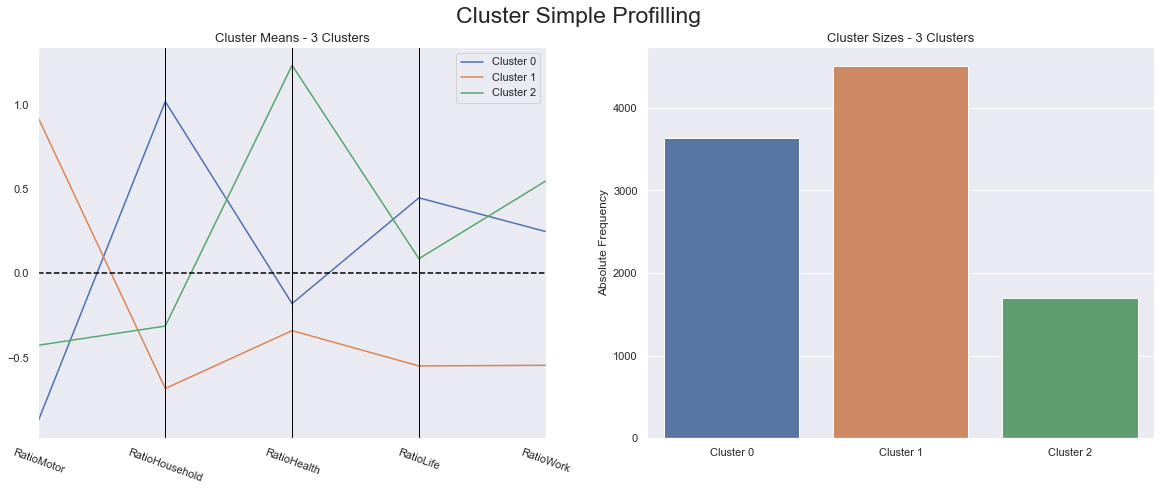

In [326]:
cluster_profiles(df_somf_prem, ['som_h_label'], (20,7))

### Demographic/Financial Perspective

In [327]:
# Repeat the SOM creation process and defined above
np.random.seed(93)

sm_dem = sompy.SOMFactory().build(
    df_dem_fin.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=demographic_financial_features
)
sm_dem.train(n_job=-1, verbose='info', train_rough_len=150, train_finetune_len=150)

 Training...
 random_initialization took: 0.003000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.166667, trainlen: 150

 epoch: 1 ---> elapsed time:  0.103000, quantization error: 0.386252

 epoch: 2 ---> elapsed time:  0.097000, quantization error: 1.493522

 epoch: 3 ---> elapsed time:  0.099000, quantization error: 1.395326

 epoch: 4 ---> elapsed time:  0.090000, quantization error: 1.365384

 epoch: 5 ---> elapsed time:  0.094000, quantization error: 1.334861

 epoch: 6 ---> elapsed time:  0.091000, quantization error: 1.319669

 epoch: 7 ---> elapsed time:  0.083000, quantization error: 1.315701

 epoch: 8 ---> elapsed time:  0.098000, quantization error: 1.313342

 epoch: 9 ---> elapsed time:  0.096000, quantization error: 1.311233

 epoch: 10 ---> elapsed time:  0.086000, quantization error: 1.309073

 epoch: 11 ---> elapsed time:  0.096000, quantization error: 1.306837

 epoch: 12 ---> elapsed time:  0.087000, quantization error: 1.304536

 epoch: 13 ---> 

 epoch: 115 ---> elapsed time:  0.093000, quantization error: 0.688818

 epoch: 116 ---> elapsed time:  0.112000, quantization error: 0.674060

 epoch: 117 ---> elapsed time:  0.095000, quantization error: 0.658265

 epoch: 118 ---> elapsed time:  0.104000, quantization error: 0.640854

 epoch: 119 ---> elapsed time:  0.113000, quantization error: 0.622487

 epoch: 120 ---> elapsed time:  0.107000, quantization error: 0.604805

 epoch: 121 ---> elapsed time:  0.112000, quantization error: 0.588092

 epoch: 122 ---> elapsed time:  0.126000, quantization error: 0.571890

 epoch: 123 ---> elapsed time:  0.107000, quantization error: 0.555312

 epoch: 124 ---> elapsed time:  0.094000, quantization error: 0.539106

 epoch: 125 ---> elapsed time:  0.107000, quantization error: 0.523092

 epoch: 126 ---> elapsed time:  0.092000, quantization error: 0.506868

 epoch: 127 ---> elapsed time:  0.099000, quantization error: 0.490434

 epoch: 128 ---> elapsed time:  0.090000, quantization error: 0.

 epoch: 79 ---> elapsed time:  0.105000, quantization error: 0.193187

 epoch: 80 ---> elapsed time:  0.103000, quantization error: 0.191993

 epoch: 81 ---> elapsed time:  0.110000, quantization error: 0.190805

 epoch: 82 ---> elapsed time:  0.103000, quantization error: 0.189583

 epoch: 83 ---> elapsed time:  0.100000, quantization error: 0.188443

 epoch: 84 ---> elapsed time:  0.121000, quantization error: 0.187214

 epoch: 85 ---> elapsed time:  0.103000, quantization error: 0.186060

 epoch: 86 ---> elapsed time:  0.100000, quantization error: 0.184958

 epoch: 87 ---> elapsed time:  0.098000, quantization error: 0.183844

 epoch: 88 ---> elapsed time:  0.131000, quantization error: 0.182735

 epoch: 89 ---> elapsed time:  0.147000, quantization error: 0.181638

 epoch: 90 ---> elapsed time:  0.125000, quantization error: 0.180572

 epoch: 91 ---> elapsed time:  0.103000, quantization error: 0.179588

 epoch: 92 ---> elapsed time:  0.113000, quantization error: 0.178567

 epoch

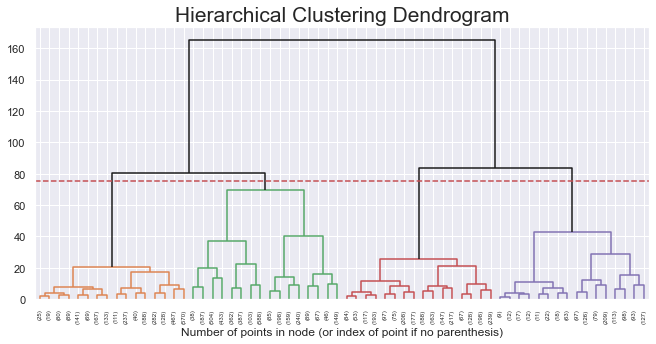

In [328]:
# let's see the best number of cluster for hierarchical

hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_dem_fin)


counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 75
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

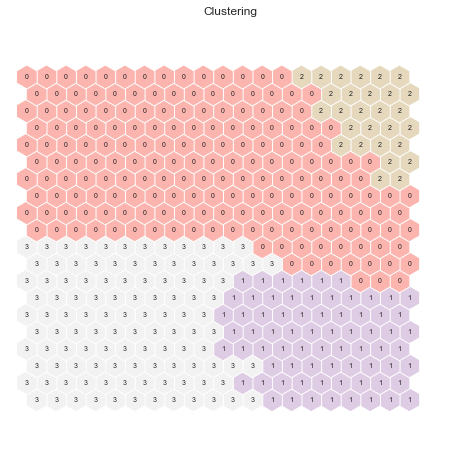

In [329]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_dem.codebook.matrix)
sm_dem.cluster_labels = nodeclus_labels 

hits  = HitMapView(8, 8,"Clustering",text_size=10)
hits.show(sm_dem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [330]:
nodes_dem = sm_dem.codebook.matrix

nodesh_dem = pd.DataFrame(nodes_dem, columns=demographic_financial_features)
nodesh_dem['som_h_label'] = nodeclus_labels
nodesh_dem

CustMonVal  ClaimsRate  PremTotal  som_h_label
0     -0.918200    0.992814   2.953486            1
1     -1.056153    1.084487   2.415927            1
2     -1.168088    1.166532   1.899852            1
3     -1.189935    1.192458   1.432908            1
4     -1.179353    1.194370   1.047088            1
..          ...         ...        ...          ...
395    1.123040   -1.562304  -0.593958            0
396    1.034145   -1.512422  -0.677768            0
397    0.971448   -1.514116  -0.784377            0
398    0.950092   -1.575214  -0.895062            0
399    0.968317   -1.670245  -0.976623            0

[400 rows x 4 columns]

In [331]:
# Obtaining BMUs
bmus_map_dem = sm_dem.find_bmu(df_dem_fin)[0] 

df_bmus_dem = pd.DataFrame(
    np.concatenate((df_dem_fin, np.expand_dims(bmus_map_dem,1)), axis=1),
    index=df_dem_fin.index, columns=np.append(df_dem_fin.columns,"BMU")
)
df_bmus_dem

CustMonVal  ClaimsRate  PremTotal    BMU
CustID                                          
1         0.656073   -0.912633  -0.463606  313.0
2        -1.384198    1.387501   0.894121    4.0
3         1.148909   -1.259229  -0.048431  389.0
4        -0.929450    0.977888  -0.822568   98.0
5        -0.721399    0.694310  -0.664554  136.0
...            ...         ...        ...    ...
10291    -0.159517    0.536767   3.062058   20.0
10292    -0.862198    0.883362  -0.596391   75.0
10294     1.226321   -1.479789  -0.293862  393.0
10295     0.134471   -0.093407   0.141451  207.0
10296     0.985879   -1.290737  -0.441475  353.0

[9838 rows x 4 columns]

In [332]:
# Get cluster labels for each observation
df_somf_dem = df_bmus_dem.merge(nodesh_dem['som_h_label'], 'left', left_on="BMU", right_index=True)

df_somf_dem.drop("BMU", axis=1, inplace=True)

In [333]:
df_somf_dem.groupby('som_h_label').mean()

CustMonVal  ClaimsRate  PremTotal
som_h_label                                   
0              0.657943   -0.846297  -0.212960
1             -0.782947    0.854850   1.163271
2              2.116524   -1.193968   1.977239
3             -0.815155    0.847532  -0.543775

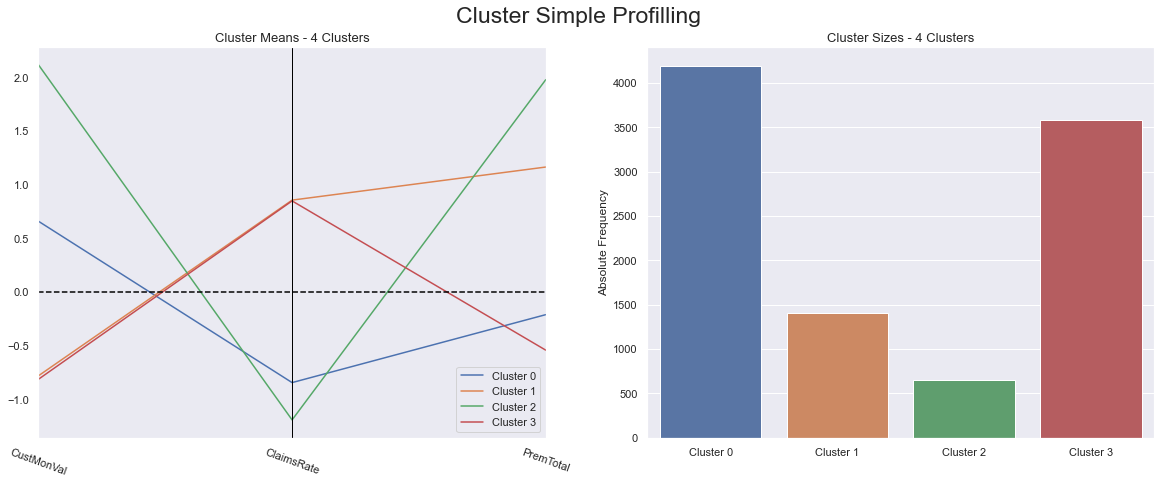

In [334]:
cluster_profiles(df_somf_dem, ['som_h_label'], (20,7))

<hr>
<a class="anchor" id="som_kmeans">
    
## 8.4 Self Organizing Maps + K-means
    
</a>

### Premiums Perspective

In [335]:
# Repeat the SOM creation process and defined above
np.random.seed(93)

sm_prem = sompy.SOMFactory().build(
    df_prem.values, 
    mapsize=[20, 20],
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=prem_features
)
sm_prem.train(n_job=-1, verbose='info', train_rough_len=150, train_finetune_len=150)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.166667, trainlen: 150

 epoch: 1 ---> elapsed time:  0.077000, quantization error: 1.079356

 epoch: 2 ---> elapsed time:  0.071000, quantization error: 2.044152

 epoch: 3 ---> elapsed time:  0.088000, quantization error: 1.984228

 epoch: 4 ---> elapsed time:  0.082000, quantization error: 1.952267

 epoch: 5 ---> elapsed time:  0.090000, quantization error: 1.919122

 epoch: 6 ---> elapsed time:  0.072000, quantization error: 1.912347

 epoch: 7 ---> elapsed time:  0.076000, quantization error: 1.904988

 epoch: 8 ---> elapsed time:  0.076000, quantization error: 1.892455

 epoch: 9 ---> elapsed time:  0.071000, quantization error: 1.880377

 epoch: 10 ---> elapsed time:  0.081000, quantization error: 1.874763

 epoch: 11 ---> elapsed time:  0.076000, quantization error: 1.872152

 epoch: 12 ---> elapsed time:  0.086000, quantization error: 1.869899

 epoch: 13 ---> 

 epoch: 115 ---> elapsed time:  0.083000, quantization error: 1.294767

 epoch: 116 ---> elapsed time:  0.079000, quantization error: 1.282928

 epoch: 117 ---> elapsed time:  0.081000, quantization error: 1.270984

 epoch: 118 ---> elapsed time:  0.095000, quantization error: 1.258858

 epoch: 119 ---> elapsed time:  0.105000, quantization error: 1.246636

 epoch: 120 ---> elapsed time:  0.088000, quantization error: 1.234131

 epoch: 121 ---> elapsed time:  0.097000, quantization error: 1.221564

 epoch: 122 ---> elapsed time:  0.089000, quantization error: 1.208822

 epoch: 123 ---> elapsed time:  0.111000, quantization error: 1.195994

 epoch: 124 ---> elapsed time:  0.085000, quantization error: 1.183045

 epoch: 125 ---> elapsed time:  0.084000, quantization error: 1.169921

 epoch: 126 ---> elapsed time:  0.080000, quantization error: 1.156631

 epoch: 127 ---> elapsed time:  0.086000, quantization error: 1.143060

 epoch: 128 ---> elapsed time:  0.072000, quantization error: 1.

 epoch: 79 ---> elapsed time:  0.081000, quantization error: 0.825088

 epoch: 80 ---> elapsed time:  0.080000, quantization error: 0.822963

 epoch: 81 ---> elapsed time:  0.076000, quantization error: 0.820837

 epoch: 82 ---> elapsed time:  0.083000, quantization error: 0.818800

 epoch: 83 ---> elapsed time:  0.103000, quantization error: 0.816801

 epoch: 84 ---> elapsed time:  0.076000, quantization error: 0.814726

 epoch: 85 ---> elapsed time:  0.071000, quantization error: 0.812581

 epoch: 86 ---> elapsed time:  0.085000, quantization error: 0.810502

 epoch: 87 ---> elapsed time:  0.068000, quantization error: 0.808417

 epoch: 88 ---> elapsed time:  0.079000, quantization error: 0.806343

 epoch: 89 ---> elapsed time:  0.071000, quantization error: 0.804343

 epoch: 90 ---> elapsed time:  0.077000, quantization error: 0.802359

 epoch: 91 ---> elapsed time:  0.070000, quantization error: 0.800336

 epoch: 92 ---> elapsed time:  0.081000, quantization error: 0.798291

 epoch

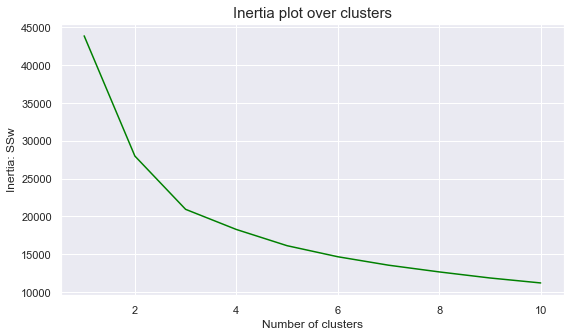

In [336]:
# defining the number of clusters, using the inertia plot

inertia = []
for n_clus in range(1,11): 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=93)
    kmclust.fit(df_prem)
    inertia.append(kmclust.inertia_)
    

plt.figure(figsize=(9,5))
plt.plot(range(1,11),inertia,color = 'green')
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

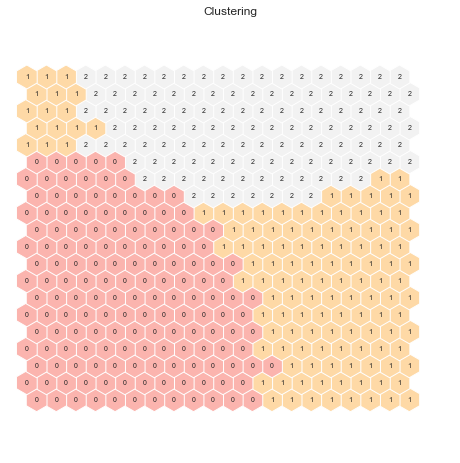

In [337]:
# As we can see by the inertia plot, we can ser that the most suitable number of clusters is three
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=93)
nodeclus_labels = kmeans.fit_predict(sm_prem.codebook.matrix)
sm_prem.cluster_labels = nodeclus_labels  

hits = HitMapView(8, 8,"Clustering", text_size=10)
hits.show(sm_prem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [338]:
nodes_prem = sm_prem.codebook.matrix

nodesk_prem = pd.DataFrame(nodes_prem, columns=prem_features)
nodesk_prem['som_k_label'] = nodeclus_labels
nodesk_prem

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  \
0     -0.570195       -0.569335     2.415268  -0.131700  -0.057947   
1     -0.628131       -0.302811     2.126698  -0.213298  -0.122470   
2     -0.597743       -0.135768     1.853617  -0.394937  -0.176475   
3     -0.385491       -0.272412     1.720156  -0.453165  -0.371201   
4     -0.123805       -0.519310     1.611995  -0.469443  -0.461338   
..          ...             ...          ...        ...        ...   
395   -1.015845        1.473411    -0.081351  -0.377096  -0.242015   
396   -0.927380        1.172631     0.242806  -0.313993  -0.263608   
397   -0.850488        0.890805     0.558643  -0.282971  -0.251431   
398   -0.822335        0.696778     0.801154  -0.101938  -0.328529   
399   -0.873899        0.632613     0.929557   0.204423  -0.384086   

     som_k_label  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
395            2  
396            2  
397            1  
398            1  
399            1  

[400 rows x 6 columns]

In [339]:
# Obtaining BMUs
bmus_map_prem = sm_prem.find_bmu(df_prem)[0] 

df_bmus_prem2 = pd.DataFrame(
    np.concatenate((df_prem, np.expand_dims(bmus_map_prem,1)), axis=1),
    index=df_prem.index, columns=np.append(df_prem.columns,"BMU")
)
df_bmus_prem2

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork    BMU
CustID                                                                      
1         0.483669       -0.527923    -0.113151   0.376085  -0.470760  172.0
2        -1.457421        1.202630    -0.959803   3.078463   1.303731  360.0
3        -0.675110        0.414295    -0.589829   1.245541   1.638644  343.0
4        -0.572190       -0.769964     2.636107   0.152888  -0.046198   20.0
5         0.376145       -0.750498     0.534872  -0.395465   0.317813  128.0
...            ...             ...          ...        ...        ...    ...
10291    -1.780109        2.317524    -1.411077   0.681010   2.043295  384.0
10292     0.681995       -0.744791     0.357281  -0.671676  -0.516317   70.0
10294     0.544432       -0.161999    -0.256950  -0.615803  -0.828158  239.0
10295    -0.816695        0.257124     0.219598   0.599829   1.872376  201.0
10296     0.701068       -0.416710    -0.195646  -0.765385  -0.590044  219.0

[9838 rows x 6 columns]

In [340]:
# Get cluster labels for each observation
df_somf_prem2 = df_bmus_prem2.merge(nodesk_prem['som_k_label'], 'left', left_on="BMU", right_index=True)

df_somf_prem2.drop('BMU', axis=1, inplace=True)

In [341]:
df_somf_prem2.groupby('som_k_label')[prem_features].mean()

RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork
som_k_label                                                               
0              0.979643       -0.660985    -0.511795  -0.540325  -0.566978
1             -0.368280       -0.180726     1.063412   0.012526   0.200168
2             -1.003083        1.256859    -0.442282   0.557115   0.414132

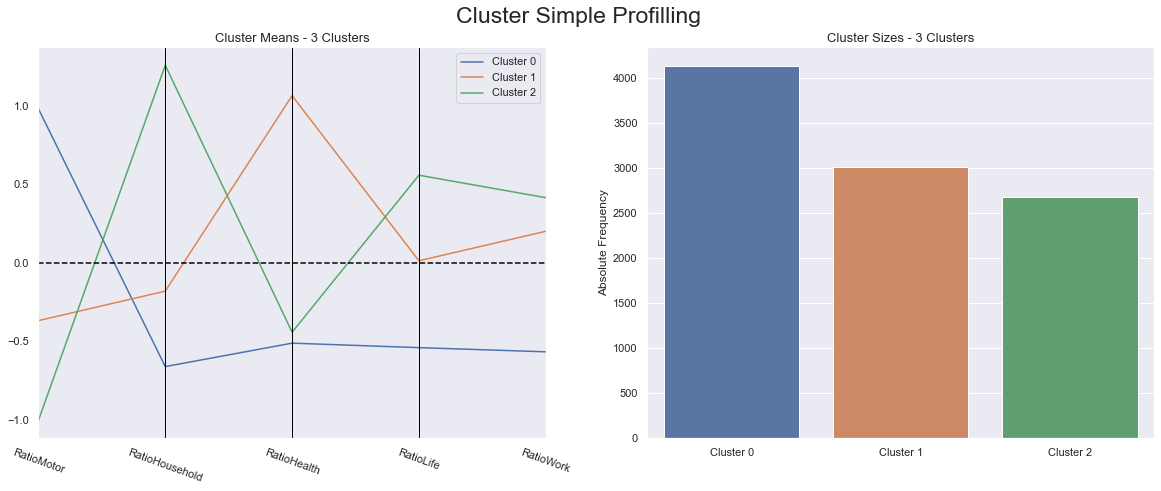

In [342]:
cluster_profiles(df_somf_prem2, ['som_k_label'], (20,7))

### Demographic/Financial Perspective

In [343]:
# Repeat the SOM creation process and defined above
np.random.seed(93)

sm_dem = sompy.SOMFactory().build(
    df_dem_fin.values, 
    mapsize=[20, 20], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=demographic_financial_features
)
sm_dem.train(n_job=-1, verbose='info', train_rough_len=150, train_finetune_len=150)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.166667, trainlen: 150

 epoch: 1 ---> elapsed time:  0.088000, quantization error: 0.386252

 epoch: 2 ---> elapsed time:  0.067000, quantization error: 1.493522

 epoch: 3 ---> elapsed time:  0.079000, quantization error: 1.395326

 epoch: 4 ---> elapsed time:  0.085000, quantization error: 1.365384

 epoch: 5 ---> elapsed time:  0.069000, quantization error: 1.334861

 epoch: 6 ---> elapsed time:  0.080000, quantization error: 1.319669

 epoch: 7 ---> elapsed time:  0.083000, quantization error: 1.315701

 epoch: 8 ---> elapsed time:  0.070000, quantization error: 1.313342

 epoch: 9 ---> elapsed time:  0.077000, quantization error: 1.311233

 epoch: 10 ---> elapsed time:  0.090000, quantization error: 1.309073

 epoch: 11 ---> elapsed time:  0.082000, quantization error: 1.306837

 epoch: 12 ---> elapsed time:  0.087000, quantization error: 1.304536

 epoch: 13 ---> 

 epoch: 115 ---> elapsed time:  0.090000, quantization error: 0.688818

 epoch: 116 ---> elapsed time:  0.090000, quantization error: 0.674060

 epoch: 117 ---> elapsed time:  0.099000, quantization error: 0.658265

 epoch: 118 ---> elapsed time:  0.083000, quantization error: 0.640854

 epoch: 119 ---> elapsed time:  0.089000, quantization error: 0.622487

 epoch: 120 ---> elapsed time:  0.105000, quantization error: 0.604805

 epoch: 121 ---> elapsed time:  0.101000, quantization error: 0.588092

 epoch: 122 ---> elapsed time:  0.093000, quantization error: 0.571890

 epoch: 123 ---> elapsed time:  0.084000, quantization error: 0.555312

 epoch: 124 ---> elapsed time:  0.077000, quantization error: 0.539106

 epoch: 125 ---> elapsed time:  0.071000, quantization error: 0.523092

 epoch: 126 ---> elapsed time:  0.071000, quantization error: 0.506868

 epoch: 127 ---> elapsed time:  0.101000, quantization error: 0.490434

 epoch: 128 ---> elapsed time:  0.079000, quantization error: 0.

 epoch: 79 ---> elapsed time:  0.070000, quantization error: 0.193187

 epoch: 80 ---> elapsed time:  0.077000, quantization error: 0.191993

 epoch: 81 ---> elapsed time:  0.078000, quantization error: 0.190805

 epoch: 82 ---> elapsed time:  0.083000, quantization error: 0.189583

 epoch: 83 ---> elapsed time:  0.084000, quantization error: 0.188443

 epoch: 84 ---> elapsed time:  0.093000, quantization error: 0.187214

 epoch: 85 ---> elapsed time:  0.085000, quantization error: 0.186060

 epoch: 86 ---> elapsed time:  0.092000, quantization error: 0.184958

 epoch: 87 ---> elapsed time:  0.092000, quantization error: 0.183844

 epoch: 88 ---> elapsed time:  0.092000, quantization error: 0.182735

 epoch: 89 ---> elapsed time:  0.105000, quantization error: 0.181638

 epoch: 90 ---> elapsed time:  0.082000, quantization error: 0.180572

 epoch: 91 ---> elapsed time:  0.084000, quantization error: 0.179588

 epoch: 92 ---> elapsed time:  0.084000, quantization error: 0.178567

 epoch

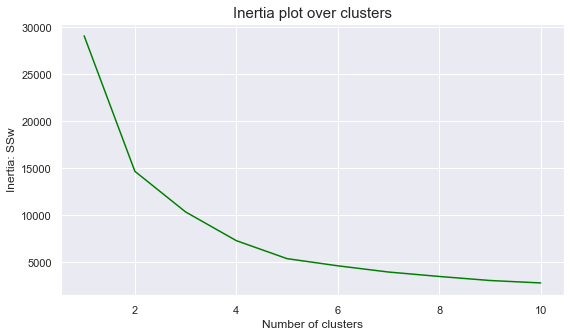

In [344]:
# defining the number of clusters, using the inertia plot

inertia = []
for n_clus in range(1,11):  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=93)
    kmclust.fit(df_dem_fin)
    inertia.append(kmclust.inertia_)  
    

plt.figure(figsize=(9,5))
plt.plot(range(1,11),inertia,color = 'green')
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

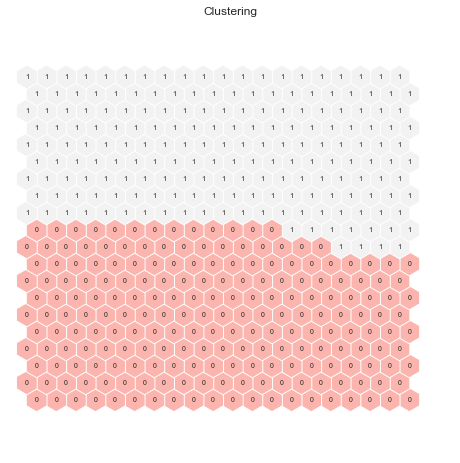

In [345]:
# Perform K-Means on top of SOM algorithm
# with the most suitable number of clusters, which is two
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=93)
nodeclus_labels = kmeans.fit_predict(sm_dem.codebook.matrix)
sm_prem.cluster_labels = nodeclus_labels 

hits = HitMapView(8, 8,"Clustering", text_size=10)
hits.show(sm_prem, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [346]:
# Check the nodes and and respective clusters
nodes_dem = sm_dem.codebook.matrix

nodesk_dem = pd.DataFrame(nodes_dem, columns=demographic_financial_features)
nodesk_dem['som_k_label'] = nodeclus_labels
nodesk_dem

CustMonVal  ClaimsRate  PremTotal  som_k_label
0     -0.918200    0.992814   2.953486            0
1     -1.056153    1.084487   2.415927            0
2     -1.168088    1.166532   1.899852            0
3     -1.189935    1.192458   1.432908            0
4     -1.179353    1.194370   1.047088            0
..          ...         ...        ...          ...
395    1.123040   -1.562304  -0.593958            1
396    1.034145   -1.512422  -0.677768            1
397    0.971448   -1.514116  -0.784377            1
398    0.950092   -1.575214  -0.895062            1
399    0.968317   -1.670245  -0.976623            1

[400 rows x 4 columns]

In [347]:
# Obtaining BMUs 
bmus_map_dem = sm_dem.find_bmu(df_dem_fin)[0]  

df_bmus_dem2 = pd.DataFrame(
    np.concatenate((df_dem_fin, np.expand_dims(bmus_map_prem,1)), axis=1),
    index=df_dem_fin.index, columns=np.append(df_dem_fin.columns,"BMU")
)
df_bmus_dem2

CustMonVal  ClaimsRate  PremTotal    BMU
CustID                                          
1         0.656073   -0.912633  -0.463606  172.0
2        -1.384198    1.387501   0.894121  360.0
3         1.148909   -1.259229  -0.048431  343.0
4        -0.929450    0.977888  -0.822568   20.0
5        -0.721399    0.694310  -0.664554  128.0
...            ...         ...        ...    ...
10291    -0.159517    0.536767   3.062058  384.0
10292    -0.862198    0.883362  -0.596391   70.0
10294     1.226321   -1.479789  -0.293862  239.0
10295     0.134471   -0.093407   0.141451  201.0
10296     0.985879   -1.290737  -0.441475  219.0

[9838 rows x 4 columns]

In [348]:
# Get cluster labels for each observation
df_somf_dem2 = df_bmus_dem2.merge(nodesk_dem['som_k_label'], 'left', left_on="BMU", right_index=True)

df_somf_dem2.drop('BMU', axis=1, inplace =True)

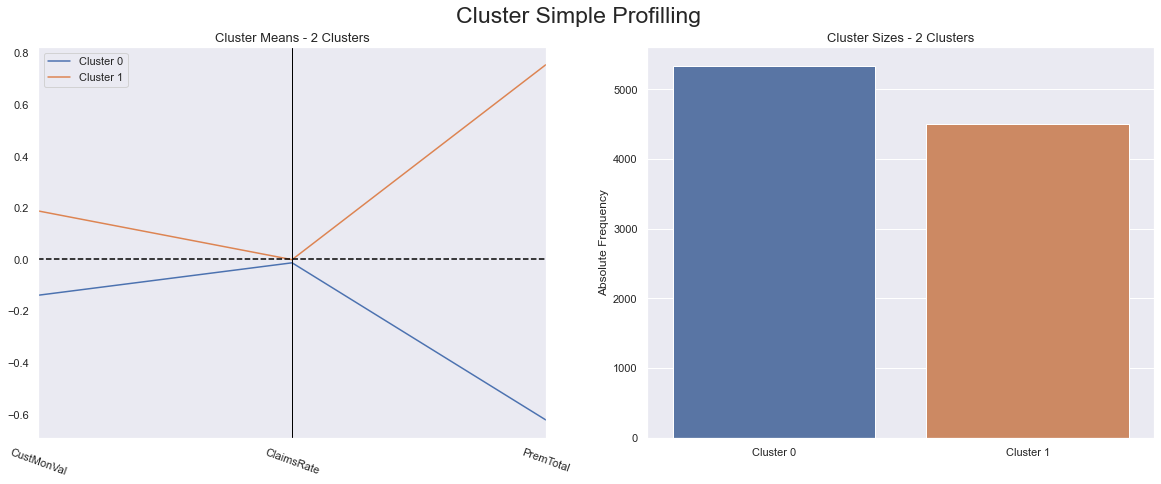

In [349]:
cluster_profiles(df_somf_dem2, ['som_k_label'], (20,7))

<hr>
<a class="anchor" id="mean_shift">
    
## 8.5 Mean Shift Clustering
    
</a>

### Premiums Perspective

In [350]:
# Create the mean shift algorithm, by establishing a value for the quantile
# The quantile value needs to be tested, so we can stay with the appropraite value
# based on the number of clusters it returns
bandwidth_prem = estimate_bandwidth(df_prem, quantile=0.042, random_state=93, n_jobs=-1)
bandwidth_prem

1.088083683927963

In [351]:
# Perform mean-shift clustering with bandwidth set previously
ms_prem = MeanShift(bandwidth=bandwidth_prem, bin_seeding=True, n_jobs=4)
ms_prem_labels = ms_prem.fit_predict(df_prem)

ms_n_clusters = len(np.unique(ms_prem_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 4


In [352]:
df_ms_prem = pd.concat([df_prem, pd.Series(ms_prem_labels, name='ms_prem_labels', index=df_prem.index)], axis=1)

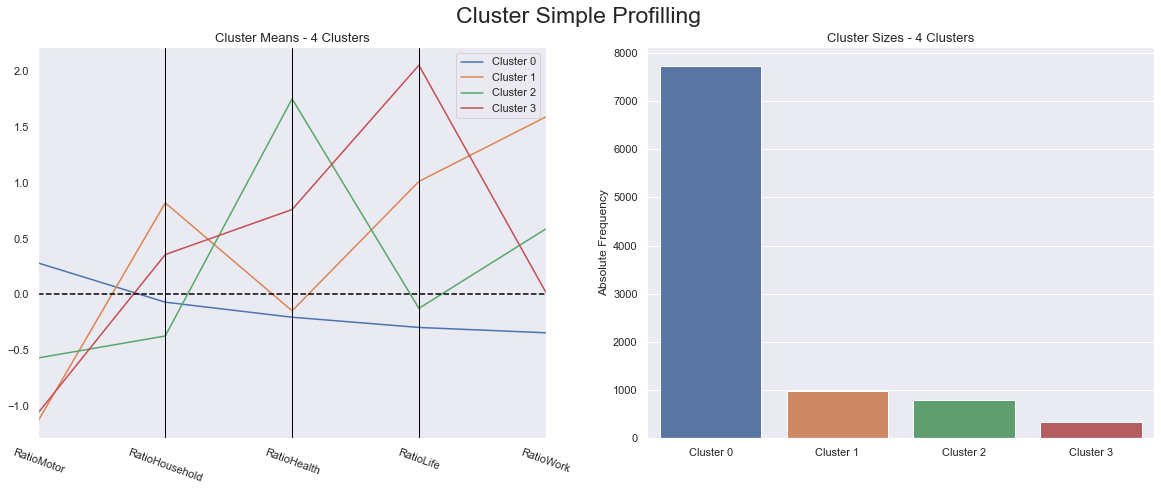

In [353]:
cluster_profiles(df_ms_prem, ['ms_prem_labels'], (20,7))

### Demographic/Financial Perspective

In [354]:
# Follow the same logic above in the creation of the algorithm
bandwidth_dem = estimate_bandwidth(df_dem_fin, quantile=0.08, random_state=93, n_jobs=-1)
bandwidth_dem

0.6926654559713719

In [355]:
# Perform mean-shift clustering with bandwidth set previously
ms_dem = MeanShift(bandwidth=bandwidth_dem, bin_seeding=True, n_jobs=4)
ms_dem_labels = ms_dem.fit_predict(df_dem_fin)

ms_n_clusters = len(np.unique(ms_dem_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 2


In [356]:
df_ms_dem = pd.concat([df_dem_fin, pd.Series(ms_dem_labels, name='ms_dem_labels', index=df_dem_fin.index)], axis=1)

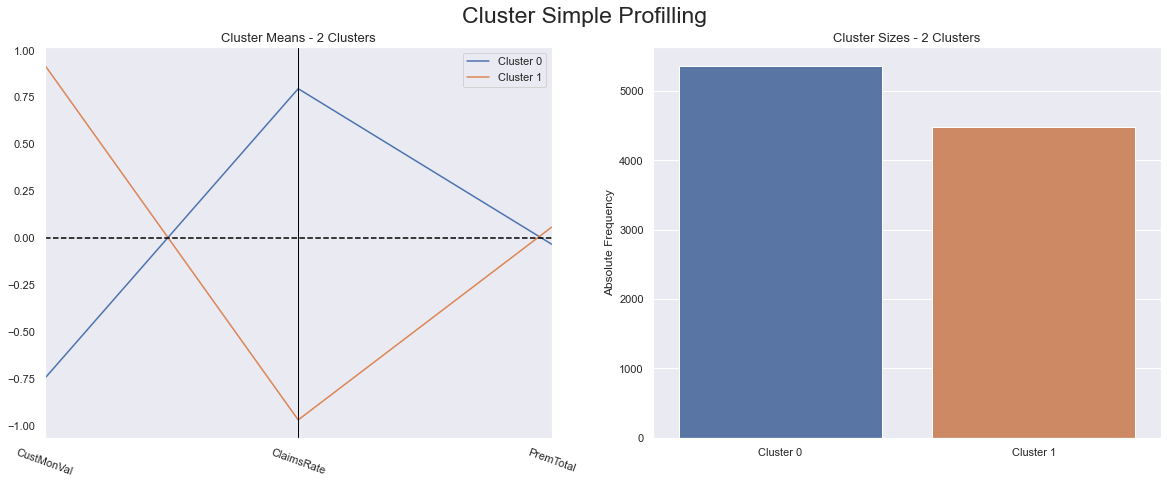

In [357]:
cluster_profiles(df_ms_dem, ['ms_dem_labels'], (20,7))

<hr>
<a class="anchor" id="dbscan">
    
## 8.6 DBSCAN
    
</a>

### Premiums Perspective

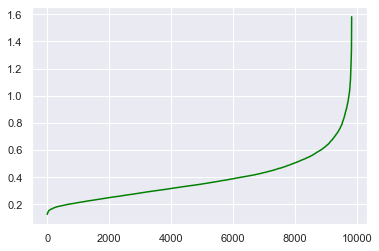

In [358]:
# To create clusters using the D-Bscan, use the same logic defined when
# detecting the outliers
neigh = NearestNeighbors(n_neighbors= 2*len(prem_features)-1)
neigh.fit(df_prem)
distances, _ = neigh.kneighbors(df_prem)
distances = np.sort(distances[:, -1])
plt.plot(distances,color = 'green')
plt.show()

In [359]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=2*len(prem_features), n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_prem)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 3


In [360]:
Counter(dbscan_labels)

Counter({0: 9580, -1: 249, 1: 9})

In [361]:
df_dbscan_prem = pd.concat([df_prem, pd.Series(dbscan_labels, name='dbscan_labels', index=df_prem.index)], axis=1)

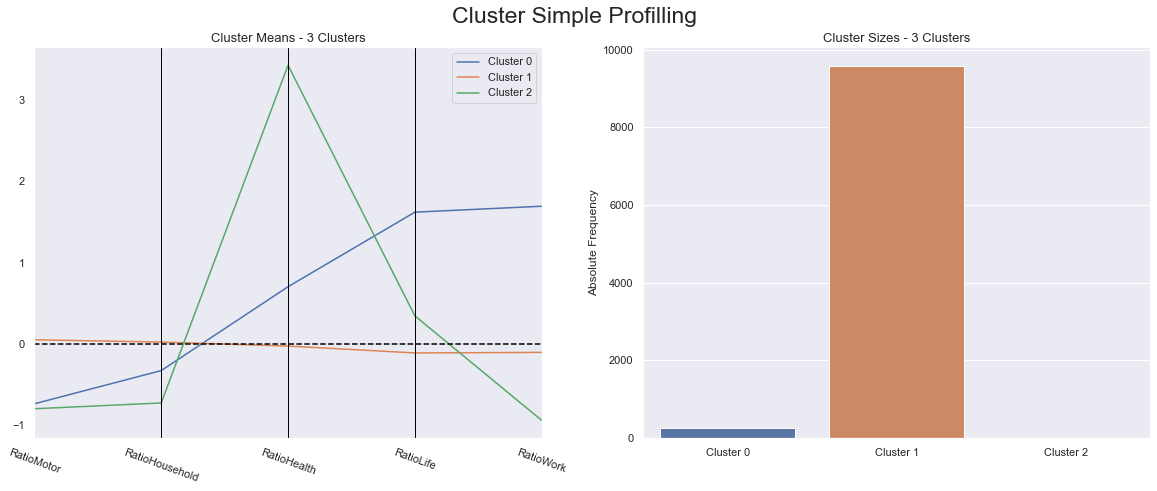

In [362]:
cluster_profiles(df_dbscan_prem, ['dbscan_labels'], (20,7))

### Demographic/Financial Perspective

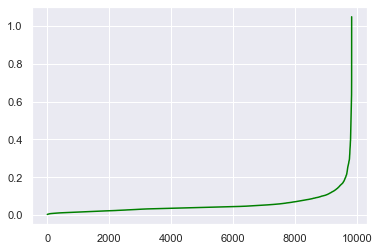

In [363]:
neigh = NearestNeighbors(n_neighbors= 2*len(demographic_financial_features)-1)
neigh.fit(df_dem_fin)
distances, _ = neigh.kneighbors(df_dem_fin)
distances = np.sort(distances[:, -1])
plt.plot(distances,color = 'green')
plt.show()

In [364]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=2*len(demographic_financial_features), n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_dem_fin)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 8


In [365]:
Counter(dbscan_labels)

Counter({0: 9639, -1: 143, 1: 10, 6: 7, 2: 6, 3: 13, 4: 14, 5: 6})

In [366]:
df_dbscan_dem = pd.concat([df_dem_fin, pd.Series(dbscan_labels, name='dbscan_labels', index=df_dem_fin.index)], axis=1)

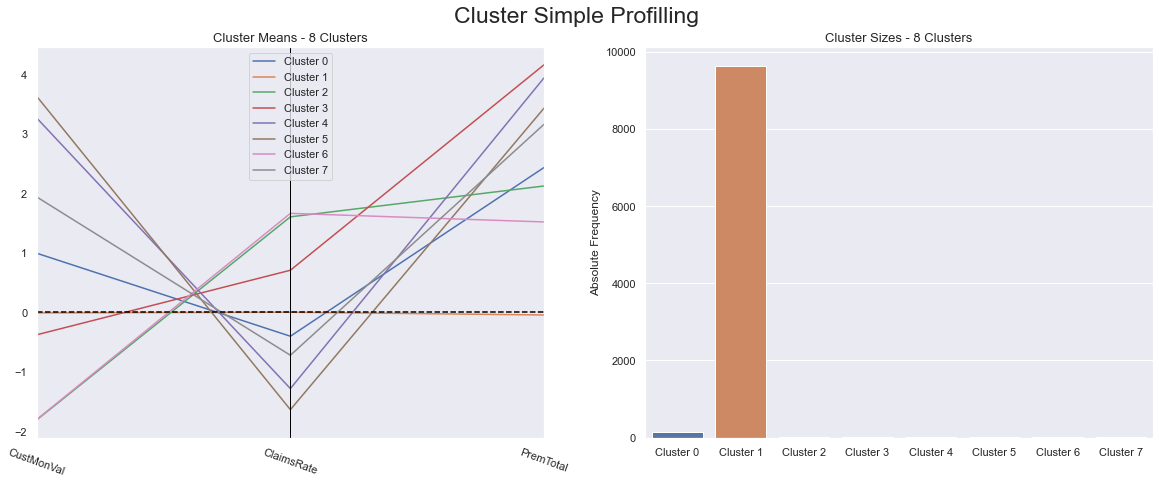

In [367]:
cluster_profiles(df_dbscan_dem, ['dbscan_labels'], (20,7))

#### As we can see from the clusters profiling, DBSCAN returns clusters solutions very imbalanced. As we can see we have in this last perspective clusters with 9000 observations and others with only 2, so this is a very bad solution to consider in our final clusters. This solution will be not considered in the Comparison Step

<hr>
<a class="anchor" id="comparison">
    
# 9. Comparison
    
</a>

In [368]:
# We need to compare all the solutions created for each perspective, so we can check
# which one of them gives the best results
df_prem['kmeans/hierchical_labels'] = df_km_prem['kmeans_labels'].copy()
df_prem['som/hierchical_labels'] = df_somf_prem['som_h_label'].copy()
df_prem['som/kmeans_labels'] = df_somf_prem2['som_k_label'].copy()
df_prem['meanshift_labels'] = df_ms_prem['ms_prem_labels'].copy()
df_prem['dbscan_labels'] = df_dbscan_prem['dbscan_labels'].copy()

df_dem_fin['kmeans/hierchical_labels'] = df_km_dem['kmeans_labels'].copy()
df_dem_fin['som/hierchical_labels'] = df_somf_dem['som_h_label'].copy()
df_dem_fin['som/kmeans_labels'] = df_somf_dem2['som_k_label'].copy()
df_dem_fin['meanshift_labels'] = df_ms_dem['ms_dem_labels'].copy()
df_dem_fin['dbscan_labels'] = df_dbscan_dem['dbscan_labels'].copy()

### Personal Perspective

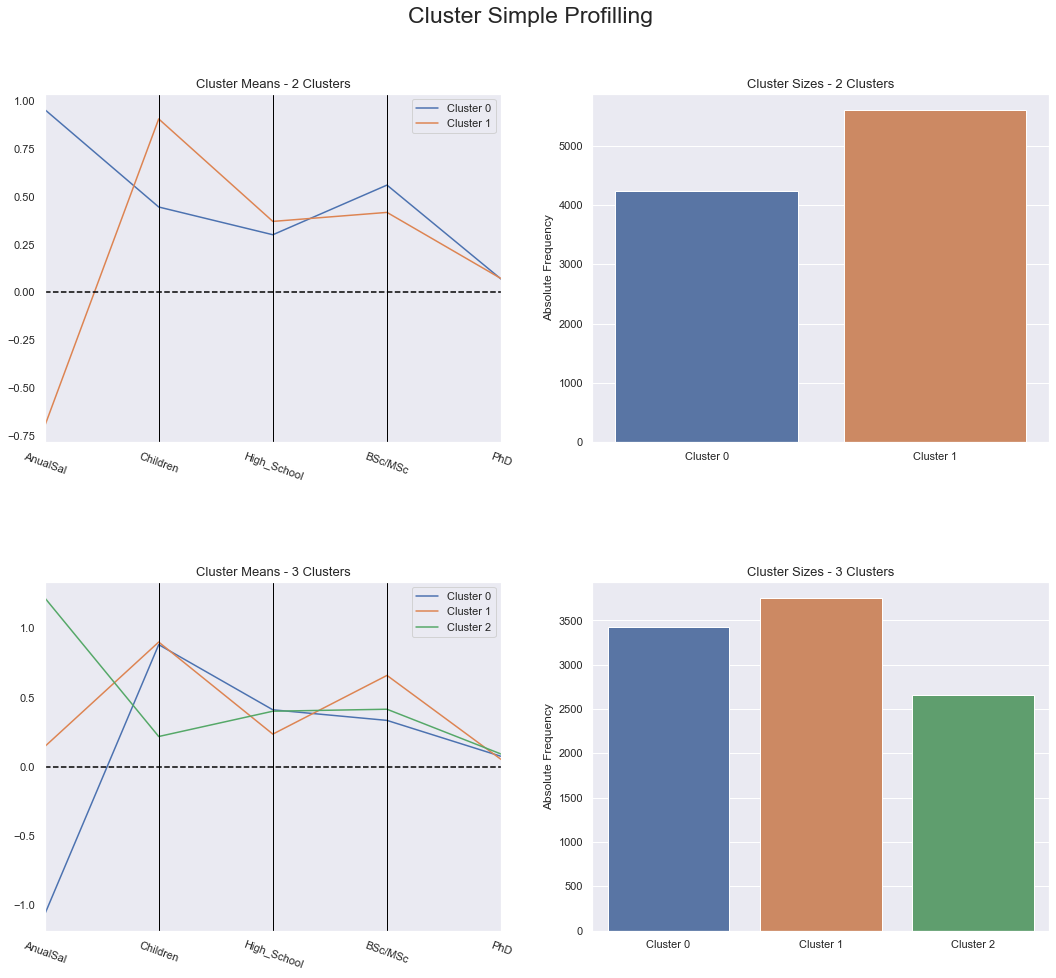

In [369]:
cluster_profiles(df_personal, ['k2prot_labels', 'k3prot_labels'], (18, 15))

#### We decided to keep the perspective which departs the data into three very balanced clusters

### Premiums Perspective

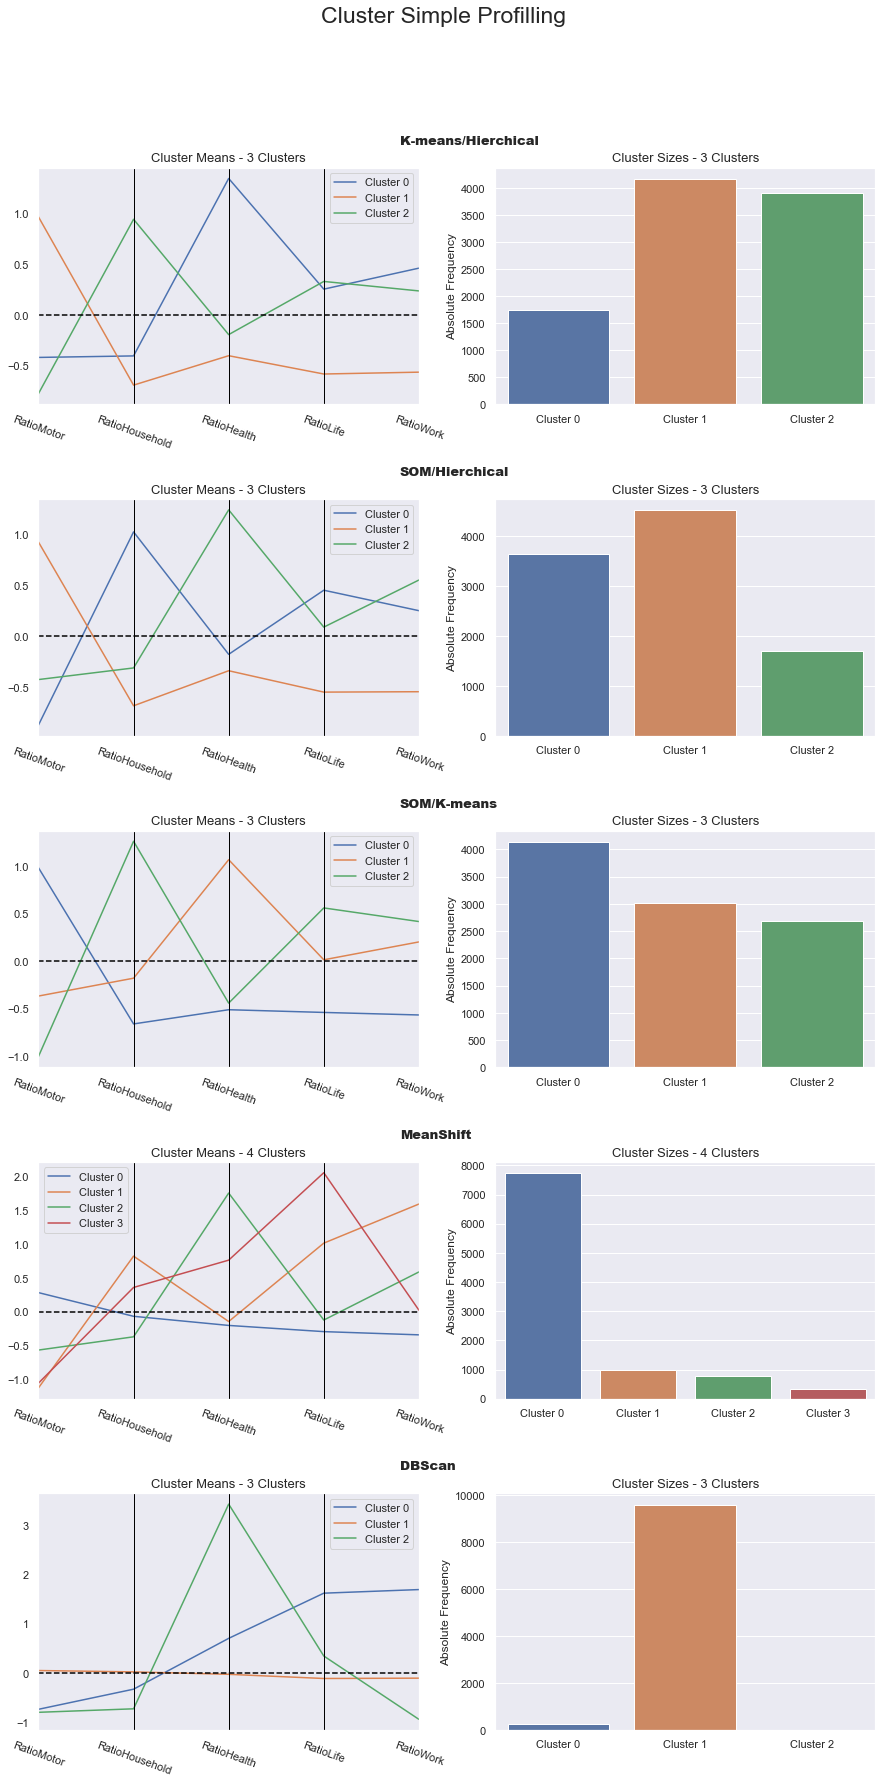

In [370]:
cluster_profiles(df_prem, ['kmeans/hierchical_labels', 
                           'som/hierchical_labels',
                           'som/kmeans_labels',
                           'meanshift_labels', 
                           'dbscan_labels'], 
                 (15, 28),
                 compar_titles = ["K-means/Hierchical", 
                                  "SOM/Hierchical", 
                                  "SOM/K-means", 
                                  "MeanShift",
                                  "DBScan"])

#### We decided to keep the SOM/ K-Means solution, since it´s the one with more balanced clusters, and also draws more relevant conclusions

### Demographic/Financial Perspective

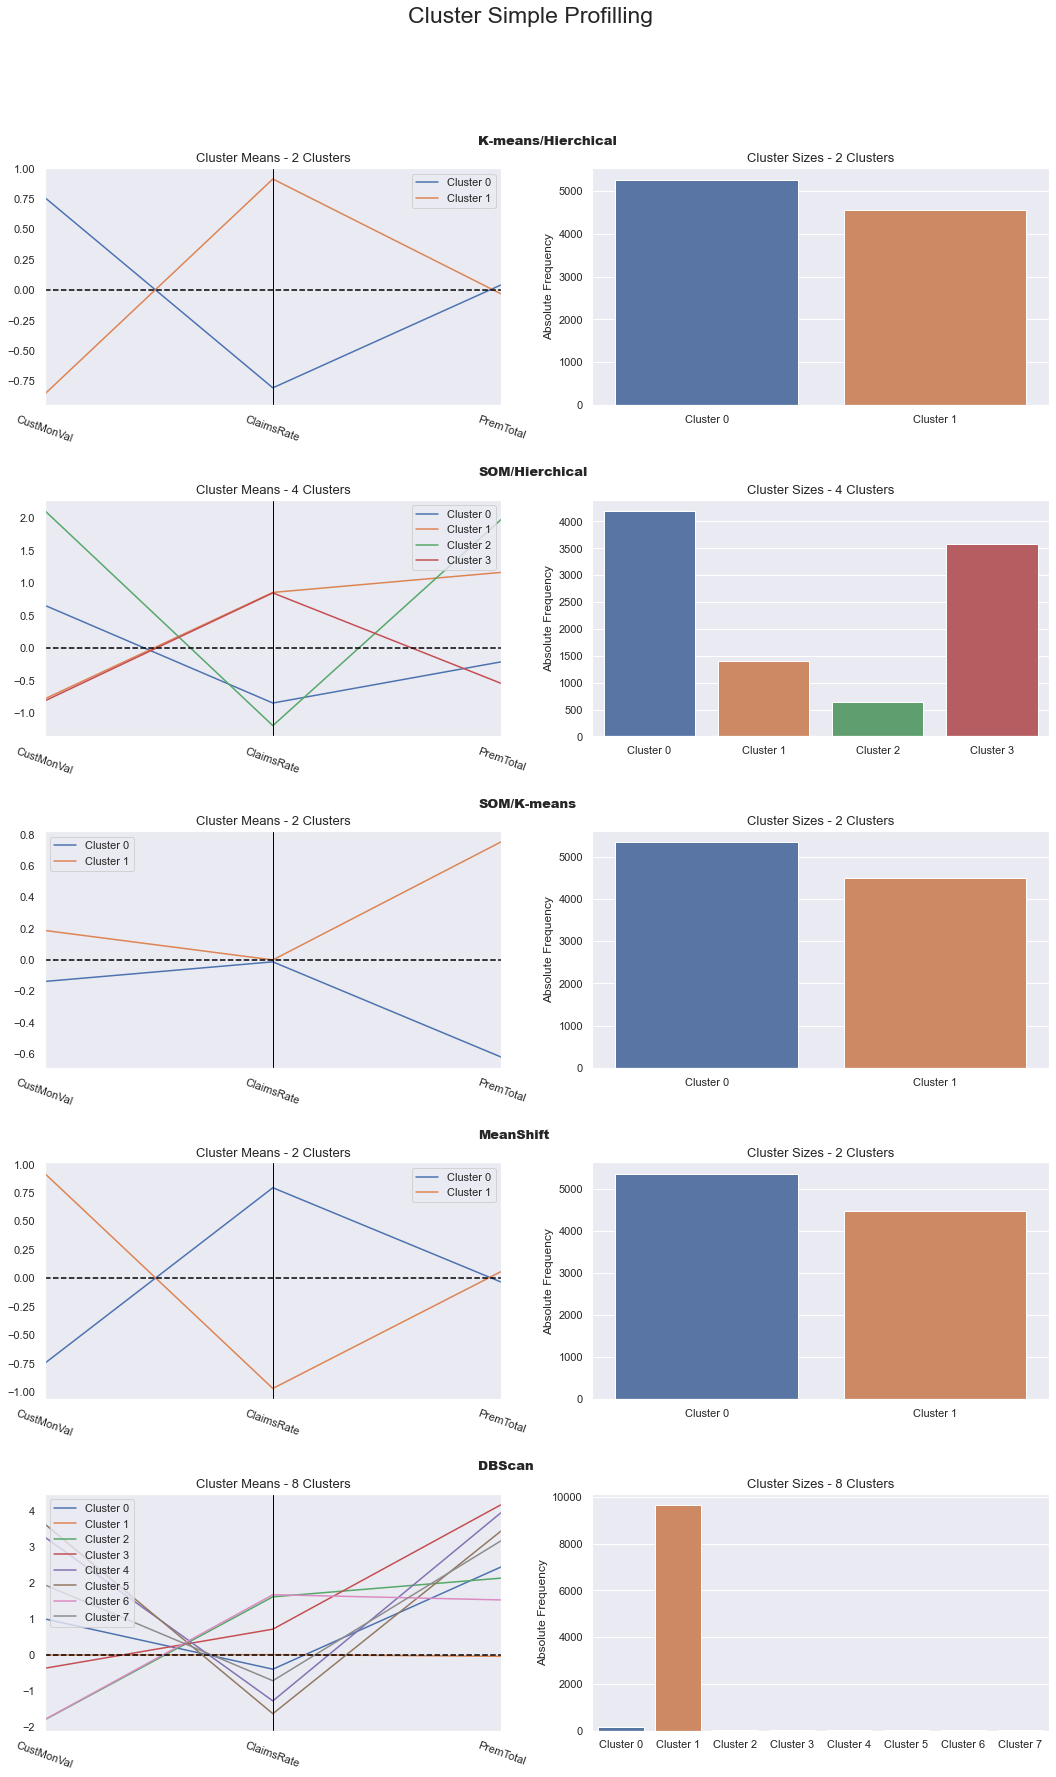

In [371]:
cluster_profiles(df_dem_fin, ['kmeans/hierchical_labels', 
                           'som/hierchical_labels',
                           'som/kmeans_labels',
                           'meanshift_labels', 
                           'dbscan_labels'], 
                 (18, 28),
                 compar_titles = ["K-means/Hierchical", 
                                  "SOM/Hierchical", 
                                  "SOM/K-means", 
                                  "MeanShift",
                                  "DBScan"])

#### We decided to keep the K-Means/Hierarchical solution, since it´s the one with more balanced clusters, and also draws more relevant conclusions

<hr>
<a class="anchor" id="merger">
    
# 10. Merging the Perspectives using Hierarchical clustering
    
</a>

In [372]:
# looking at the visualizations we choose to use for:
# Personal Perspective - K-Prototypes with 3 clusters
# Premiums Perspective - SOM & K-Means
# Demographic/Financial Perspective - SOM & Hierchical

# Use hierarchical clustering, to merge the three best clustering solutions
df['personal_labels'] = df_personal['k3prot_labels']
df['premiums_labels'] = df_prem['som/kmeans_labels']
df['dem/financial_labels'] = df_dem_fin['kmeans/hierchical_labels']

In [373]:
df.drop('dbscan_labels', axis=1, inplace=True)

In [374]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['personal_labels', 'premiums_labels', 'dem/financial_labels'])\
    [metric_features].mean()
df_centroids

CustMonVal  ClaimsRate  \
personal_labels premiums_labels dem/financial_labels                           
0               0               0                       0.781559   -1.124293   
                                1                      -0.917557    0.967582   
                1               0                       0.316550   -0.400277   
                                1                      -0.836971    0.869946   
                2               0                       1.379550   -0.778256   
                                1                      -0.800522    0.889285   
1               0               0                       0.830160   -1.224651   
                                1                      -0.925755    0.978405   
                1               0                       0.332584   -0.468352   
                                1                      -0.829422    0.860203   
                2               0                       1.002788   -0.676596   
                                1                      -0.718215    0.815803   
2               0               0                       0.746184   -1.041149   
                                1                      -0.882939    0.923053   
                1               0                       0.275027   -0.370005   
                                1                      -0.862068    0.896295   
                2               0                       1.082707   -0.689365   
                                1                      -0.752696    0.838350   

                                                      YearsCustomer  \
personal_labels premiums_labels dem/financial_labels                  
0               0               0                         -0.015071   
                                1                          0.007873   
                1               0                          0.040841   
                                1                          0.049570   
                2               0                         -0.012868   
                                1                         -0.048774   
1               0               0                          0.009705   
                                1                          0.047452   
                1               0                         -0.001761   
                                1                          0.020239   
                2               0                          0.062298   
                                1                         -0.002492   
2               0               0                          0.000150   
                                1                         -0.018861   
                1               0                         -0.039953   
                                1                         -0.058416   
                2               0                         -0.132928   
                                1                         -0.004307   

                                                      PremTotal  AnualSal  \
personal_labels premiums_labels dem/financial_labels                        
0               0               0                     -0.523094 -0.837270   
                                1                     -0.646899 -0.807843   
                1               0                     -0.163922 -1.046859   
                                1                     -0.306132 -1.023580   
                2               0                      1.401093 -1.241750   
                                1                      1.577316 -1.274954   
1               0               0                     -0.582215  0.142530   
                                1                     -0.657524  0.123309   
                1               0                     -0.280345  0.139354   
                                1                     -0.427127  0.116071   
                2               0                      0.837975  0.236863   
                               

In [375]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

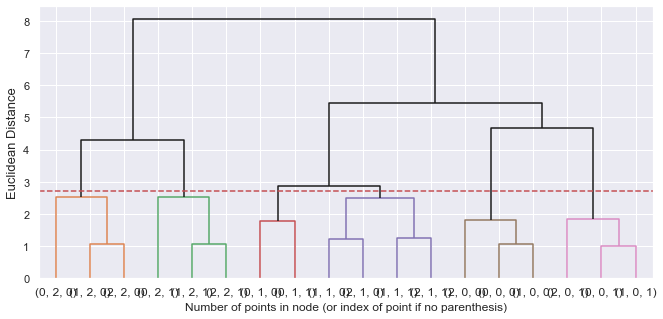

In [376]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)


for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 2.7
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [377]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=6
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

CustMonVal  ClaimsRate  \
personal_labels premiums_labels dem/financial_labels                           
0               0               0                       0.781559   -1.124293   
                                1                      -0.917557    0.967582   
                1               0                       0.316550   -0.400277   
                                1                      -0.836971    0.869946   
                2               0                       1.379550   -0.778256   
                                1                      -0.800522    0.889285   
1               0               0                       0.830160   -1.224651   
                                1                      -0.925755    0.978405   
                1               0                       0.332584   -0.468352   
                                1                      -0.829422    0.860203   
                2               0                       1.002788   -0.676596   
                                1                      -0.718215    0.815803   
2               0               0                       0.746184   -1.041149   
                                1                      -0.882939    0.923053   
                1               0                       0.275027   -0.370005   
                                1                      -0.862068    0.896295   
                2               0                       1.082707   -0.689365   
                                1                      -0.752696    0.838350   

                                                      YearsCustomer  \
personal_labels premiums_labels dem/financial_labels                  
0               0               0                         -0.015071   
                                1                          0.007873   
                1               0                          0.040841   
                                1                          0.049570   
                2               0                         -0.012868   
                                1                         -0.048774   
1               0               0                          0.009705   
                                1                          0.047452   
                1               0                         -0.001761   
                                1                          0.020239   
                2               0                          0.062298   
                                1                         -0.002492   
2               0               0                          0.000150   
                                1                         -0.018861   
                1               0                         -0.039953   
                                1                         -0.058416   
                2               0                         -0.132928   
                                1                         -0.004307   

                                                      PremTotal  AnualSal  \
personal_labels premiums_labels dem/financial_labels                        
0               0               0                     -0.523094 -0.837270   
                                1                     -0.646899 -0.807843   
                1               0                     -0.163922 -1.046859   
                                1                     -0.306132 -1.023580   
                2               0                      1.401093 -1.241750   
                                1                      1.577316 -1.274954   
1               0               0                     -0.582215  0.142530   
                                1                     -0.657524  0.123309   
                1               0                     -0.280345  0.139354   
                                1                     -0.427127  0.116071   
                2               0                      0.837975  0.236863   
                               

In [378]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['personal_labels'], row['premiums_labels'], row['dem/financial_labels'])
    ], axis=1
)

df_.groupby('merged_labels').mean()[metric_features]

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  \
merged_labels                                                               
0               -0.772297    0.861863      -0.028160   1.344414 -0.342959   
1                1.209875   -0.729997      -0.029500   1.161860 -0.222339   
2               -0.222691    0.177236      -0.027185  -0.291394  0.843794   
3                0.804060   -1.168950       0.002351  -0.546869  0.102745   
4               -0.916289    0.966119       0.027061  -0.641594  0.117984   
5               -0.202890    0.171715       0.044772  -0.227960 -1.036376   

               RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  
merged_labels                                                                 
0               -1.066992        1.328577    -0.447144   0.590005   0.425713  
1               -0.951843        1.199359    -0.438384   0.530746   0.404847  
2               -0.315901       -0.214265     1.035026  -0.019924   0.168832  
3                0.925710       -0.599048    -0.514487  -0.521780  -0.556078  
4                1.036825       -0.726655    -0.508940  -0.559987  -0.578535  
5               -0.455025       -0.125182     1.110422   0.066268   0.252064

In [379]:
# As we can see our merged clusters, are very balanced in terms of number of observations
Counter(df_['merged_labels'])

Counter({3: 2129, 0: 1193, 1: 1488, 5: 1137, 4: 2008, 2: 1883})

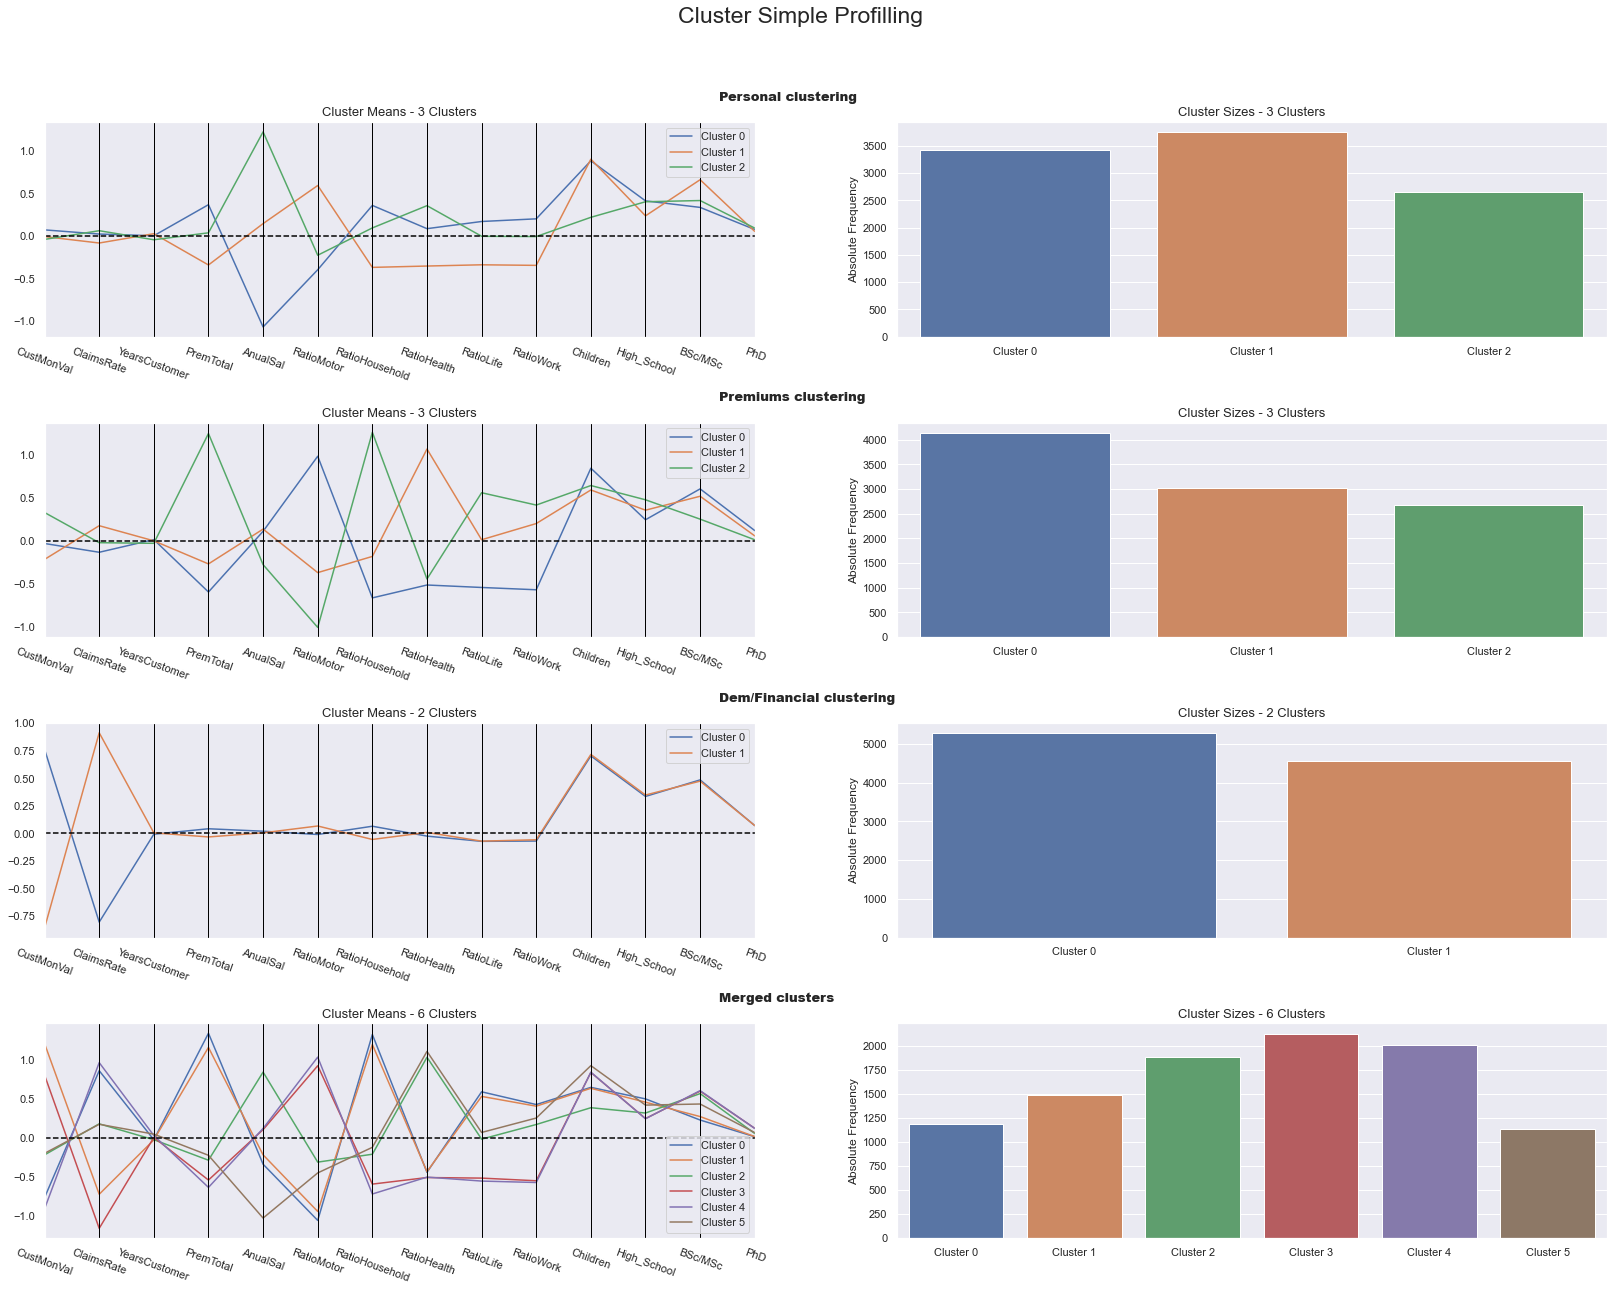

In [380]:
# Profilling each cluster (personal, premiums, dem/financial, merged)
cluster_profiles(
    df = df_, 
    label_columns = ['personal_labels', 'premiums_labels', 'dem/financial_labels', 'merged_labels'], 
    figsize = (28, 20), 
    compar_titles = ["Personal clustering", "Premiums clustering", "Dem/Financial clustering","Merged clusters"]
)

<hr>
<a class="anchor" id="t-sne">
    
# 11. Cluster visualization using t-SNE
    
</a>

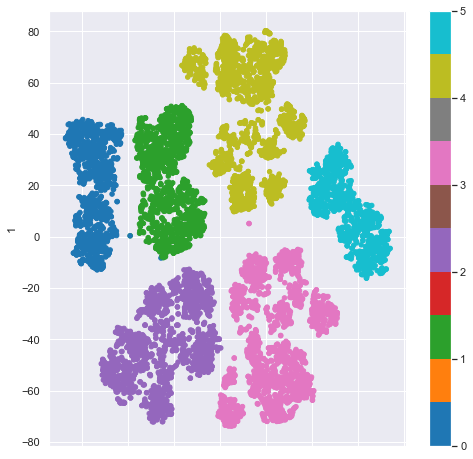

In [381]:
# Apply t-SNE to get a more realistic visualization of our clusters
two_dim = TSNE(random_state=93).fit_transform(df_)


pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_['merged_labels'], colormap='tab10', figsize=(8,8))
plt.show()

<hr>
<a class="anchor" id="outliers">
    
# 12. Assess feature importance and reclassify outliers
    
</a>

### Feature importance

In [382]:
# Finally and in order to classify the previous outliers, it´s important to get the
# r squared of each variable (which reflect it importance), and the use algorithms
# such as Decision Trees or K-Nearest Neighbours to classify them
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [383]:
# Get R² for each variable
r2_variables(df_[(personal_features + prem_features + demographic_financial_features) + ['merged_labels']], 'merged_labels').drop('merged_labels').sort_values(ascending = False)

RatioMotor        0.727669
ClaimsRate        0.677550
RatioHousehold    0.630417
CustMonVal        0.630338
PremTotal         0.598908
RatioHealth       0.519594
AnualSal          0.291959
RatioLife         0.277757
RatioWork         0.252748
Children          0.165732
BSc/MSc           0.089519
High_School       0.043540
PhD               0.030120
dtype: float64

### Decision Trees

In [384]:
# Preparing the data
X = df_.drop(columns=['personal_labels','premiums_labels','dem/financial_labels','merged_labels'])
y = df_['merged_labels']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=93, stratify=y
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=93, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 84.21% of the customers correctly


In [385]:
# Feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

CustMonVal        0.308876
ClaimsRate        0.136034
YearsCustomer     0.000000
PremTotal         0.000000
AnualSal          0.146263
RatioMotor        0.237666
RatioHousehold    0.000000
RatioHealth       0.171161
RatioLife         0.000000
RatioWork         0.000000
Children          0.000000
High_School       0.000000
BSc/MSc           0.000000
PhD               0.000000
dtype: float64

In [386]:
# Predicting the cluster labels of the outliers
#df_out['merged_labels'] = dt.predict(df_out)
#df_out.head()

### KNN

In [387]:
kn = KNeighborsClassifier(n_neighbors = 8)
kn.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(kn.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 89.50% of the customers correctly


In [388]:
df_out['merged_labels'] = kn.predict(df_out)
df_out.head()

CustMonVal  ClaimsRate  YearsCustomer  PremTotal  AnualSal  \
CustID                                                               
15       -1.216347    1.387501       0.458318  -1.185956 -0.550076   
54       -0.906900    0.946379       0.458318   0.194289 -1.405151   
116       0.455034   -0.629055      -0.299390  -0.395277 -0.700972   
140       1.726608   -1.353755       1.216026   0.825737  0.722786   
155       1.039505   -1.763368      -1.663264  -0.997235 -0.188747   

        RatioMotor  RatioHousehold  RatioHealth  RatioLife  RatioWork  \
CustID                                                                  
15        2.013889       -1.810885    -0.886393  -0.574992  -0.350165   
54       -0.885426        0.407115     1.333965   0.103865  -0.209066   
116       0.343187       -0.177533     0.410771  -0.879400  -0.939360   
140      -0.359703        0.854259    -0.155500  -0.319032  -0.856574   
155       1.841312       -1.230099    -1.186667  -0.830744  -0.828059   

        Children  High_School  BSc/MSc  PhD  merged_labels  
CustID                                                      
15           1.0          1.0      0.0  0.0              4  
54           1.0          1.0      0.0  0.0              5  
116          1.0          1.0      0.0  0.0              3  
140          1.0          1.0      0.0  0.0              1  
155          0.0          0.0      1.0  0.0              3

#### Therefore, and after the analysis of the two types of algorithm, we decided to stick with the results of K-NN since these show a higher efficiency rate, presenting a value of about 89% of consumers estimated correctly.

In [389]:
df_out['merged_labels'].value_counts()

1    107
2    100
0     93
5     67
3     45
4     41
Name: merged_labels, dtype: int64